In [134]:
import pandas as pd

# Load dataset (update path as needed)
file_path = '/content/hotel_bookings.csv'
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [129]:
# Convert categorical columns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],
                                          categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                                          ordered=True)

In [ ]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


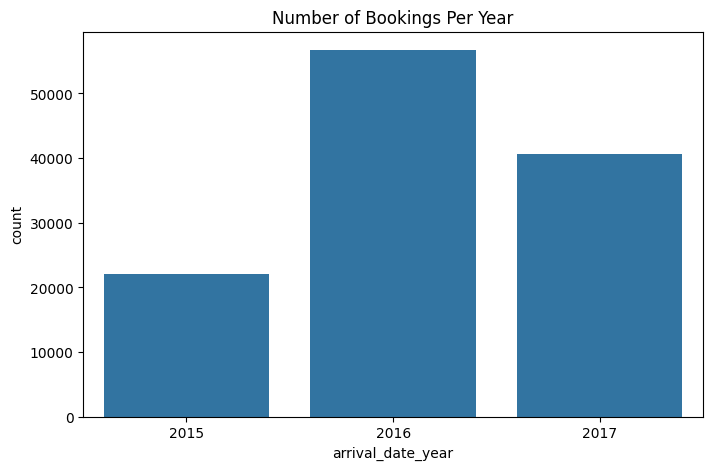

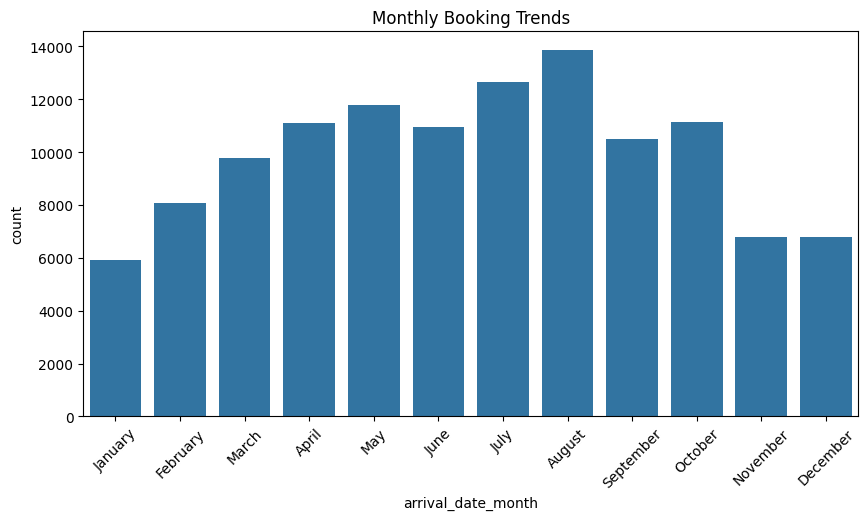

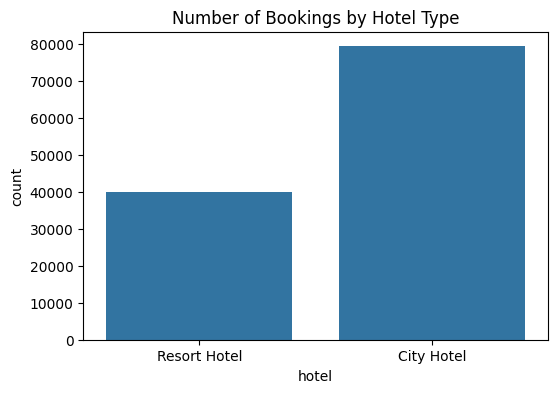

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bookings per year
plt.figure(figsize=(8, 5))
sns.countplot(x='arrival_date_year', data=df)
plt.title('Number of Bookings Per Year')
plt.show()

# Monthly Booking Trends
plt.figure(figsize=(10, 5))
sns.countplot(x='arrival_date_month', data=df, order=df['arrival_date_month'].cat.categories)
plt.title('Monthly Booking Trends')
plt.xticks(rotation=45)
plt.show()

# Bookings by Hotel Type
plt.figure(figsize=(6, 4))
sns.countplot(x='hotel', data=df)
plt.title('Number of Bookings by Hotel Type')
plt.show()


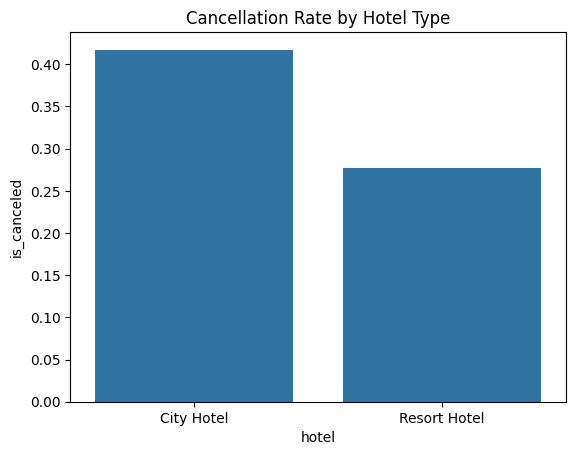

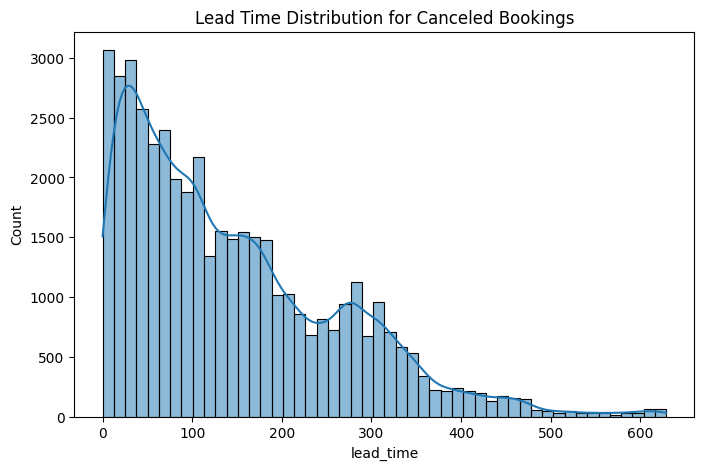

In [ ]:
# Cancellation rate by hotel type
cancel_rate = df.groupby('hotel')['is_canceled'].mean().reset_index()
sns.barplot(x='hotel', y='is_canceled', data=cancel_rate)
plt.title('Cancellation Rate by Hotel Type')
plt.show()

# Lead time vs. Cancellations
plt.figure(figsize=(8, 5))
sns.histplot(df[df['is_canceled'] == 1]['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution for Canceled Bookings')
plt.show()


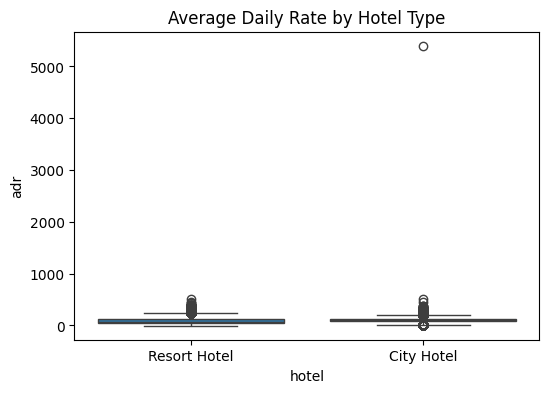

Canceled Revenue: 4641942.670000001
Confirmed Revenue: 7515674.93


In [ ]:
# Average ADR by hotel type
plt.figure(figsize=(6, 4))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('Average Daily Rate by Hotel Type')
plt.show()

# Impact of cancellations on revenue
canceled_revenue = df[df['is_canceled'] == 1]['adr'].sum()
confirmed_revenue = df[df['is_canceled'] == 0]['adr'].sum()
print(f"Canceled Revenue: {canceled_revenue}")
print(f"Confirmed Revenue: {confirmed_revenue}")


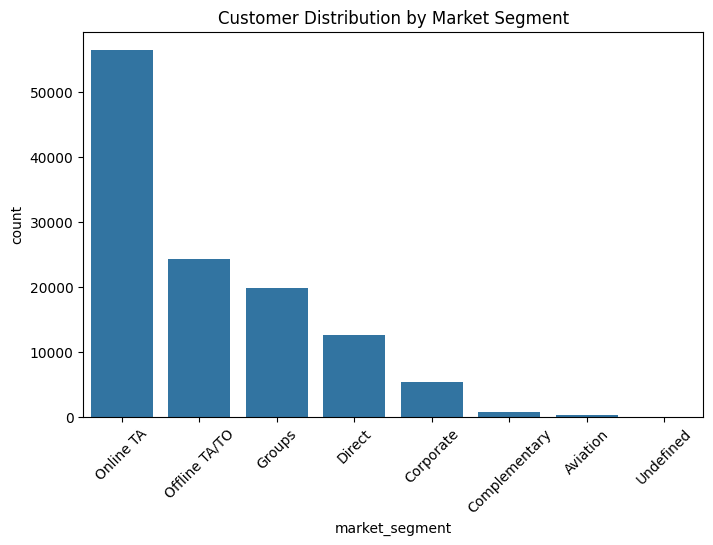

In [ ]:
# Customer distribution by market segment
plt.figure(figsize=(8, 5))
sns.countplot(x='market_segment', data=df, order=df['market_segment'].value_counts().index)
plt.title('Customer Distribution by Market Segment')
plt.xticks(rotation=45)
plt.show()


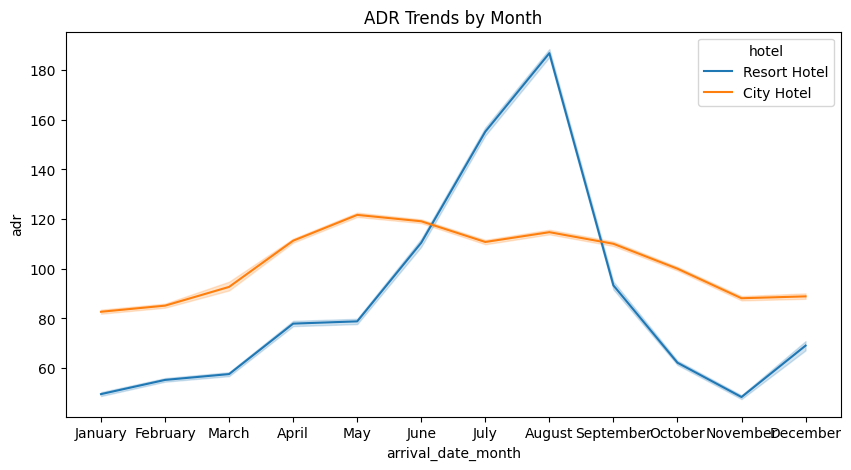

In [ ]:
# ADR Trends Analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df)
plt.title("ADR Trends by Month")
plt.show()


     customer_type        adr
0         Contract  65.454545
1            Group  75.173975
2        Transient  63.343423
3  Transient-Party  67.443646


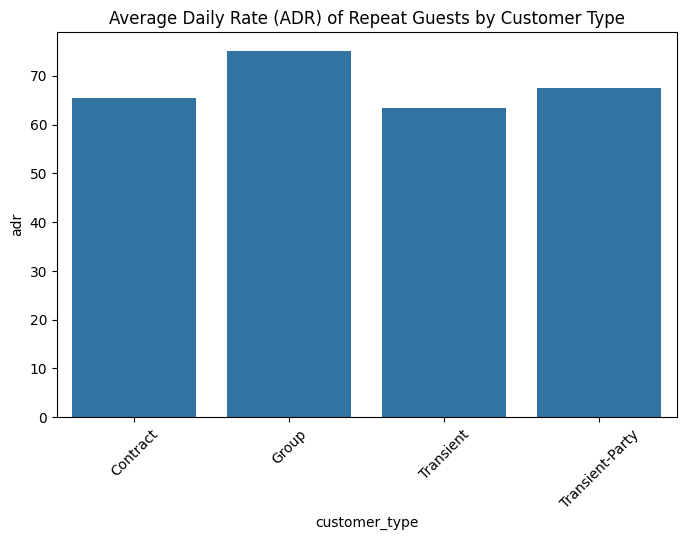

In [ ]:
# Identify Repeat Guests
repeat_guests = df[df['is_repeated_guest'] == 1].groupby('customer_type')['adr'].mean().reset_index()
print(repeat_guests)

# Visualize Repeat Guest ADR by Customer Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='customer_type', y='adr', data=repeat_guests)
plt.title('Average Daily Rate (ADR) of Repeat Guests by Customer Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

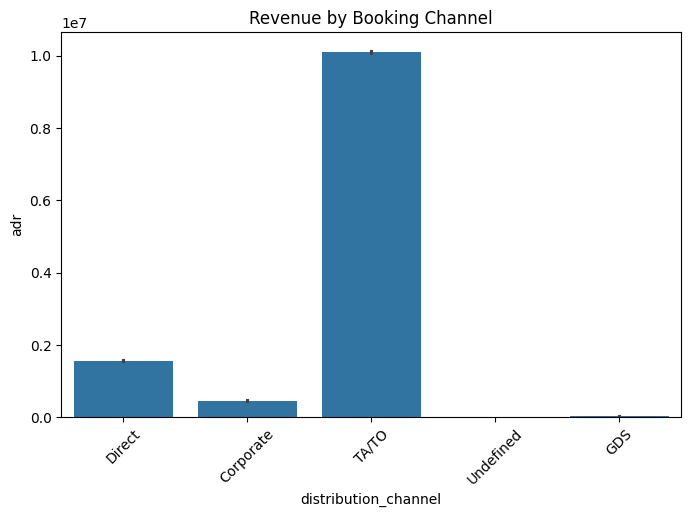

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='distribution_channel', y='adr', data=df, estimator=sum)
plt.title("Revenue by Booking Channel")
plt.xticks(rotation=45)
plt.show()

  market_segment         adr
0       Aviation  100.142110
1  Complementary    2.886366
2      Corporate   69.358952
3         Direct  115.445175
4         Groups   79.479472
5  Offline TA/TO   87.354783
6      Online TA  117.197063
7      Undefined   15.000000


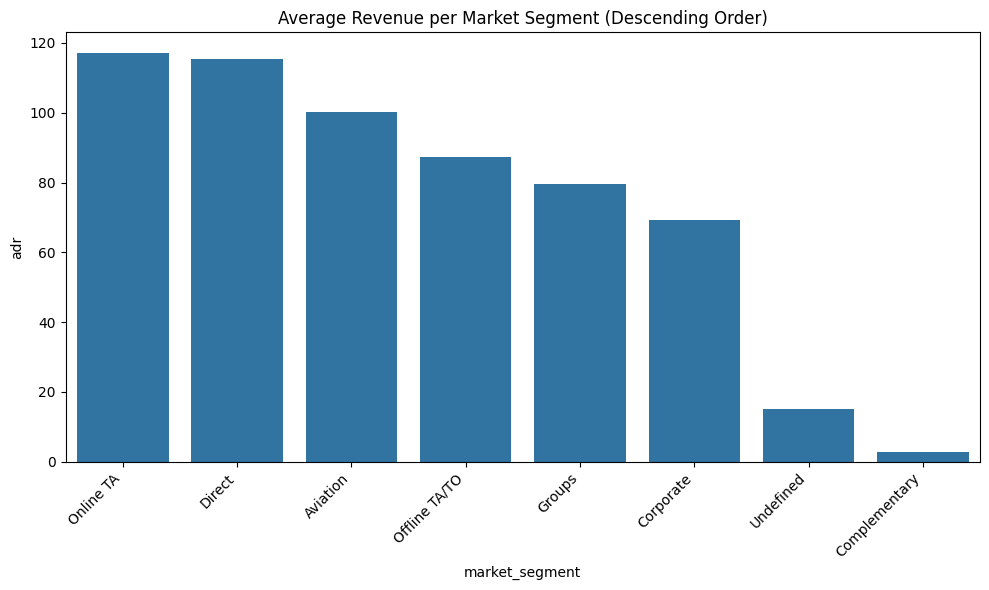

In [ ]:
# Calculate Average Revenue per Segment
customer_value = df.groupby('market_segment')['adr'].mean().reset_index()
print(customer_value)

# Visualize Average Revenue per Segment in Descending Order
import seaborn as sns
import matplotlib.pyplot as plt

# Sort customer_value DataFrame by 'adr' in descending order
customer_value = customer_value.sort_values('adr', ascending=False)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='market_segment', y='adr', data=customer_value)
plt.title('Average Revenue per Market Segment (Descending Order)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-23-c7721b7a4b13>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_percentage = df.groupby('arrival_date_month')['required_car_parking_spaces'].value_counts(normalize=True).mul(100).reset_index(name='percentage')


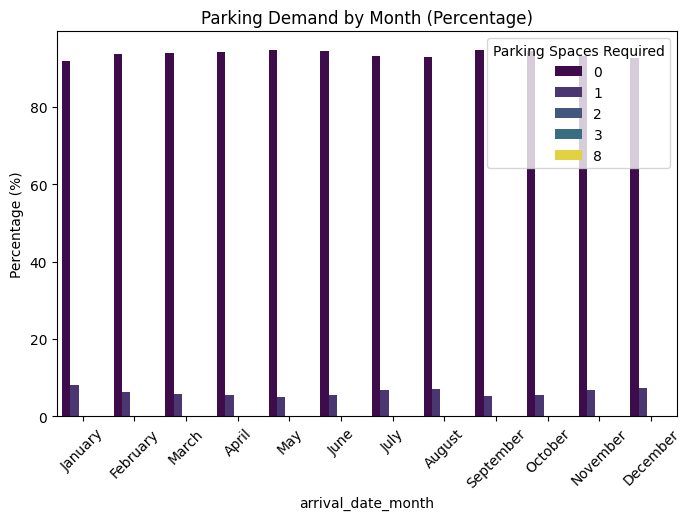

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Compute percentages
df_percentage = df.groupby('arrival_date_month')['required_car_parking_spaces'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Plot
ax = sns.barplot(x='arrival_date_month', y='percentage', hue='required_car_parking_spaces', data=df_percentage, palette='viridis')

# Customize legend
ax.legend(title="Parking Spaces Required", loc="upper right")
plt.title("Parking Demand by Month (Percentage)")
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.show()



<ipython-input-19-5f66afbf6e13>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_colors)


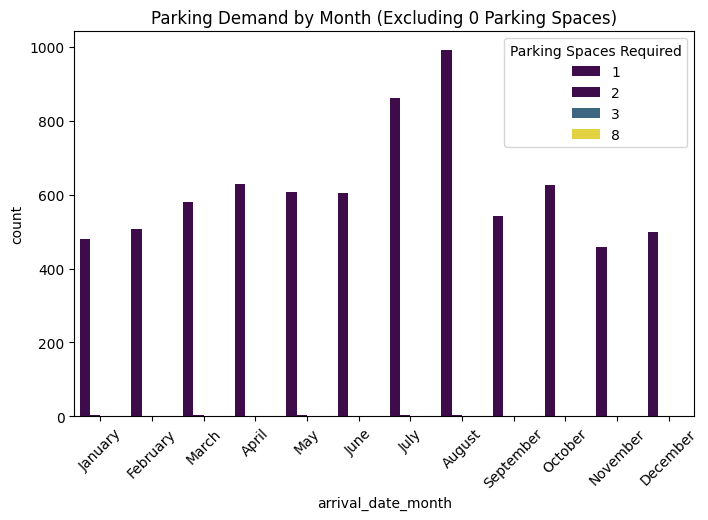

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Filter out data where 'required_car_parking_spaces' is 0
filtered_df = df[df['required_car_parking_spaces'] != 0]

plt.figure(figsize=(8, 5))

# Get a colormap with distinct colors (excluding 0 if needed)
num_colors = len(filtered_df['required_car_parking_spaces'].unique())
cmap = plt.cm.get_cmap('viridis', num_colors)
# OR use qualitative colormaps: 'Set1', 'Set2', 'Dark2', 'Paired', etc.
# cmap = plt.cm.get_cmap('Set1', num_colors)

ax = sns.countplot(x='arrival_date_month', hue='required_car_parking_spaces',
                   data=filtered_df, palette=cmap)

plt.title("Parking Demand by Month (Excluding 0 Parking Spaces)")
plt.xticks(rotation=45)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Parking Spaces Required", loc="upper right")
plt.show()

     agent  total_bookings  cancel_rate
51    58.0             335     0.880597
172  236.0             247     1.000000
233  326.0             165     0.975758
29    31.0             162     0.950617
135  170.0              93     1.000000
39    41.0              75     1.000000
323  495.0              57     0.877193
205  286.0              45     1.000000
150  192.0              41     0.829268
130  162.0              37     1.000000
31    33.0              31     0.806452
184  252.0              29     0.896552
171  235.0              29     1.000000
321  492.0              28     1.000000
230  323.0              25     1.000000
188  257.0              24     1.000000
56    64.0              23     0.956522


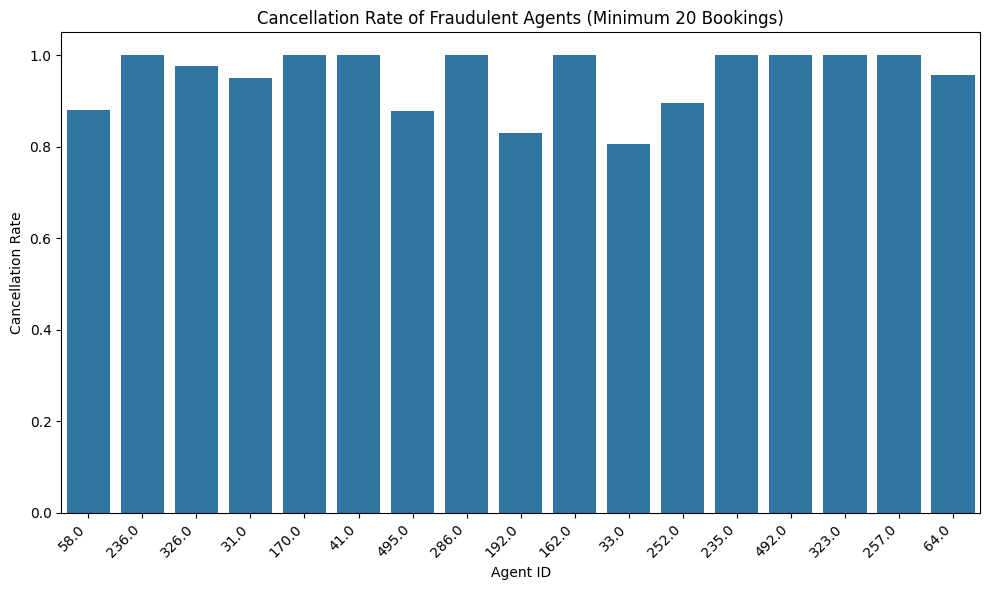

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set minimum booking threshold (e.g., at least 20 bookings)
min_bookings_threshold = 20

# Calculate total bookings and cancellation rate per agent
agent_stats = df.groupby('agent').agg(total_bookings=('is_canceled', 'count'),
                                      cancel_rate=('is_canceled', 'mean')).reset_index()

# Filter agents with high cancellation rates but only if they meet the minimum booking threshold
fraud_agents = agent_stats[(agent_stats['cancel_rate'] > 0.8) & (agent_stats['total_bookings'] >= min_bookings_threshold)]

# Sort by total bookings in descending order
fraud_agents = fraud_agents.sort_values(by='total_bookings', ascending=False)

# Display results (print the DataFrame)
print(fraud_agents)

# Visualize Fraudulent Agents
plt.figure(figsize=(10, 6))
sns.barplot(x='agent', y='cancel_rate', data=fraud_agents, order=fraud_agents['agent'])
plt.title('Cancellation Rate of Fraudulent Agents (Minimum 20 Bookings)')
plt.xlabel('Agent ID')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# Identify low-demand months
low_demand_months = df['arrival_date_month'].value_counts().tail(3)
print(low_demand_months)

arrival_date_month
November    6794
December    6780
January     5929
Name: count, dtype: int64


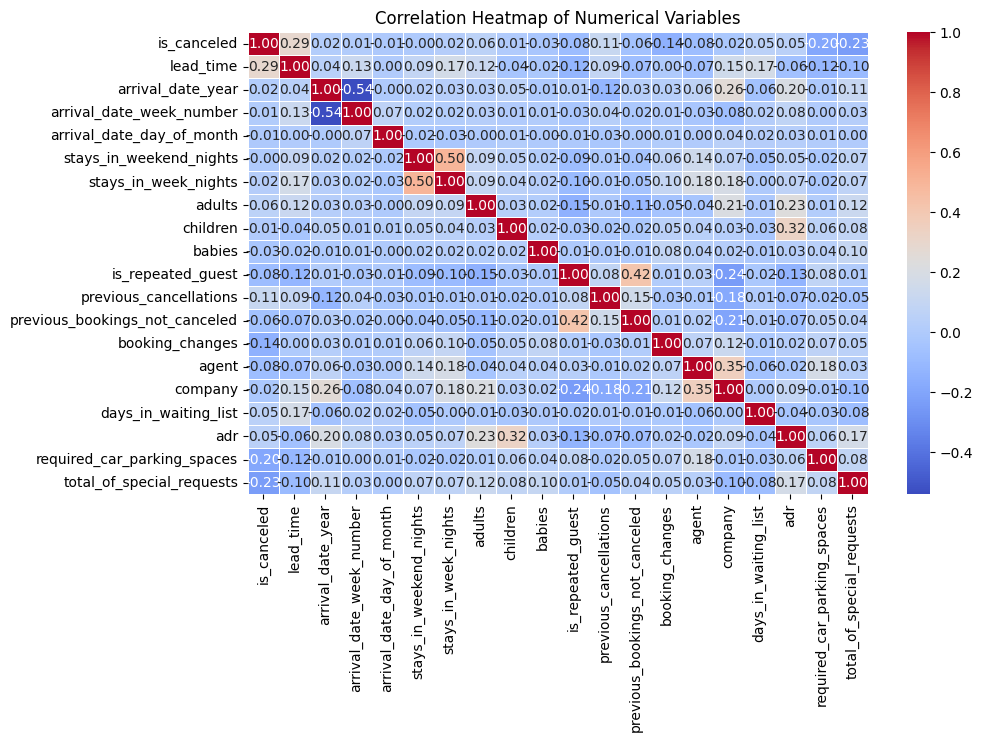

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix only for numerical features
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

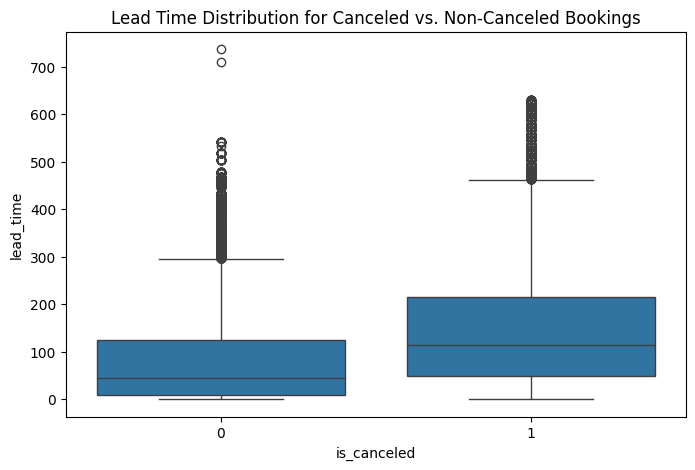

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time Distribution for Canceled vs. Non-Canceled Bookings")
plt.show()


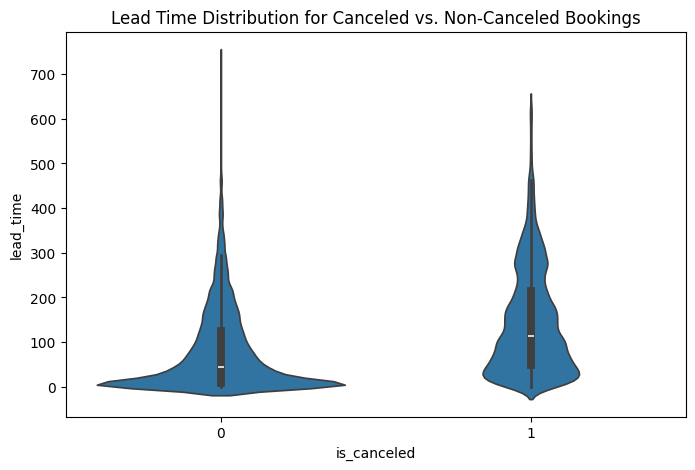

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time Distribution for Canceled vs. Non-Canceled Bookings")
plt.show()

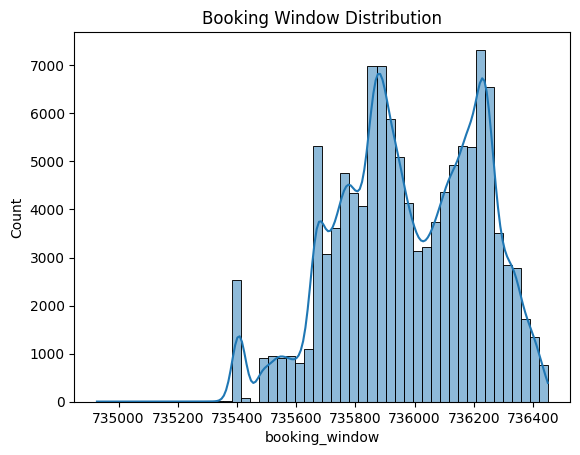

In [ ]:
df['booking_window'] = df['arrival_date_year']*365 + df['arrival_date_week_number']*7 - df['lead_time']
sns.histplot(df['booking_window'], bins=50, kde=True)
plt.title("Booking Window Distribution")
plt.show()

In [ ]:
df['room_changed'] = df['reserved_room_type'] != df['assigned_room_type']
room_change_rate = df['room_changed'].mean()
print(f"Percentage of Guests Who Got a Different Room: {room_change_rate*100:.2f}%")

Percentage of Guests Who Got a Different Room: 12.49%


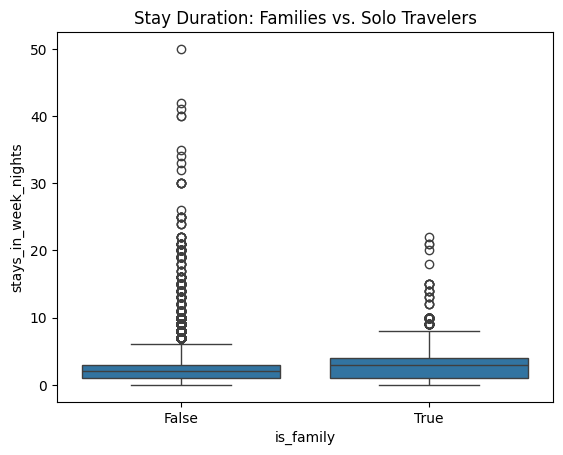

In [ ]:
df['is_family'] = (df['children'] + df['babies']) > 0
sns.boxplot(x='is_family', y='stays_in_week_nights', data=df)
plt.title("Stay Duration: Families vs. Solo Travelers")
plt.show()

     customer_type         adr
2        Transient  107.013621
0         Contract   87.549637
3  Transient-Party   86.084253
1            Group   83.488579


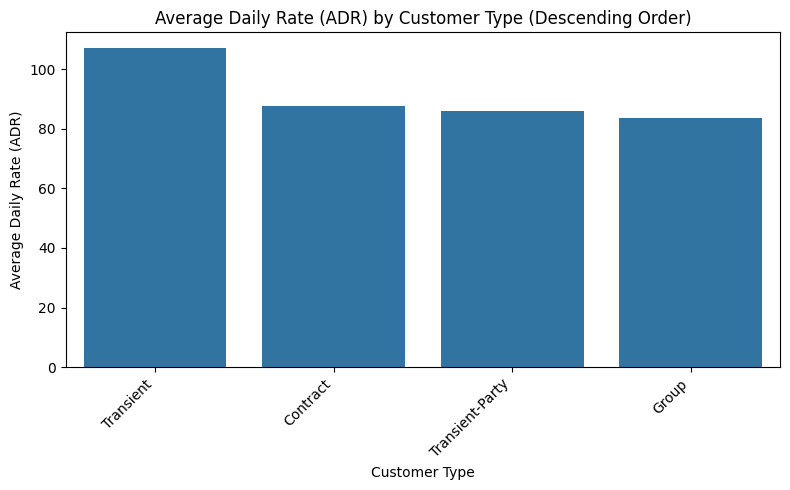

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

high_value_customers = df.groupby('customer_type')['adr'].mean().reset_index().sort_values(by='adr', ascending=False)
print(high_value_customers)

# Visualize high-value customers in descending order of ADR
plt.figure(figsize=(8, 5))
sns.barplot(x='customer_type', y='adr', data=high_value_customers, order=high_value_customers['customer_type'])  # Order by 'customer_type' from high_value_customers
plt.title('Average Daily Rate (ADR) by Customer Type (Descending Order)')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


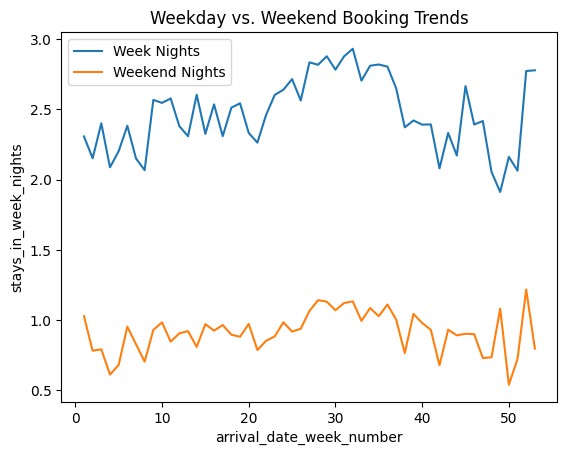

In [ ]:
weekday_demand = df.groupby('arrival_date_week_number')[['stays_in_week_nights', 'stays_in_weekend_nights']].mean().reset_index()
sns.lineplot(x='arrival_date_week_number', y='stays_in_week_nights', data=weekday_demand, label="Week Nights")
sns.lineplot(x='arrival_date_week_number', y='stays_in_weekend_nights', data=weekday_demand, label="Weekend Nights")
plt.title("Weekday vs. Weekend Booking Trends")
plt.legend()
plt.show()


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64


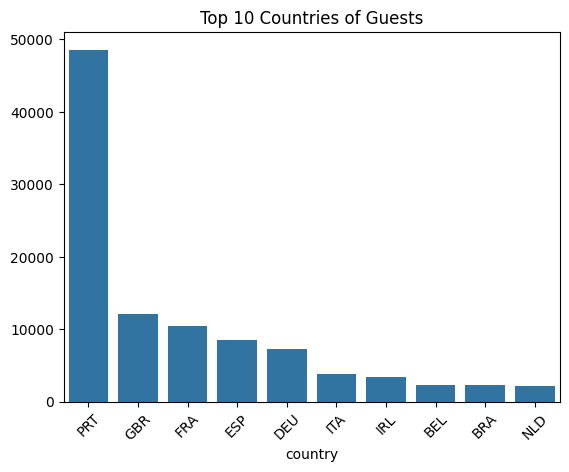

In [ ]:
top_countries = df['country'].value_counts().head(10)
print(top_countries)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries of Guests")
plt.show()

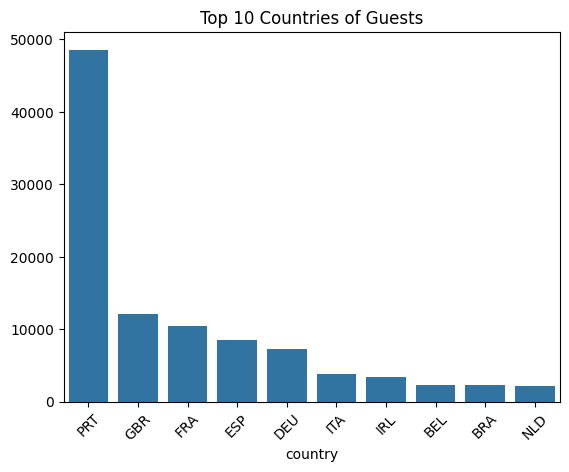

In [ ]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries of Guests")
plt.show()


<ipython-input-48-dfe67e8edc89>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = df.groupby('arrival_date_month').size().reset_index(name='booking_count')
<ipython-input-48-dfe67e8edc89>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_month', y='booking_count', data=monthly_bookings, order=month_order, palette="viridis")


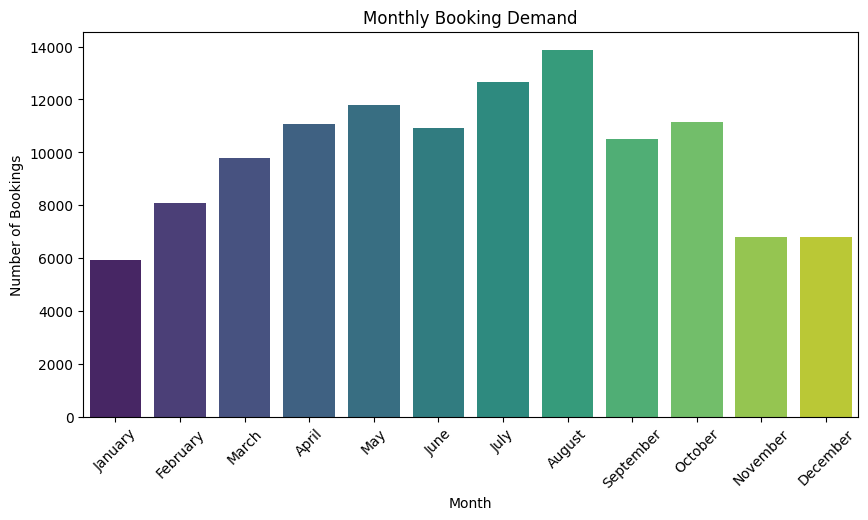

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate monthly bookings correctly
monthly_bookings = df.groupby('arrival_date_month').size().reset_index(name='booking_count')

# Ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='arrival_date_month', y='booking_count', data=monthly_bookings, order=month_order, palette="viridis")

# Formatting
plt.title("Monthly Booking Demand")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


<ipython-input-51-30ec6c7c63e9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_guest_revenue = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()


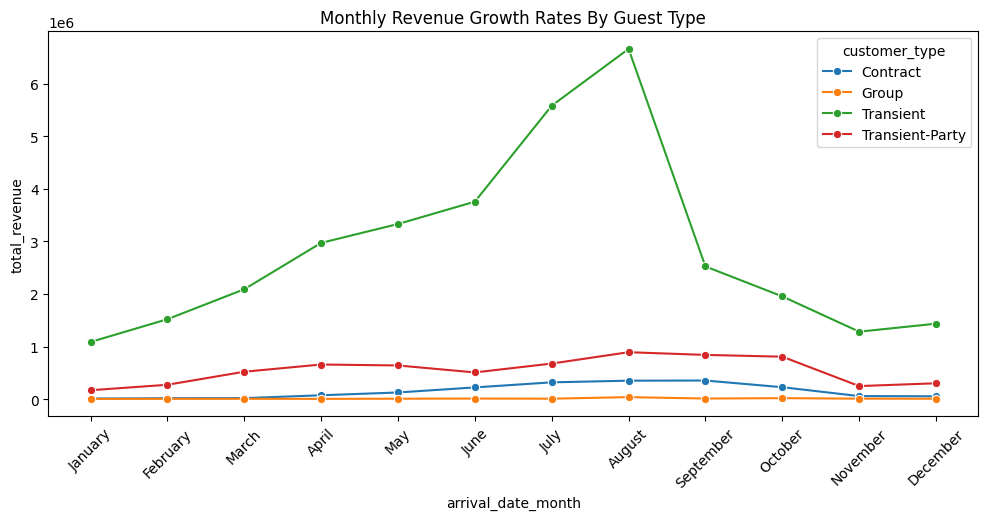

In [ ]:
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])

monthly_guest_revenue = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='customer_type', data=monthly_guest_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Growth Rates By Guest Type")
plt.show()


<ipython-input-52-017886cf28c8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_segment_revenue = df.groupby(['arrival_date_month', 'market_segment'])['total_revenue'].sum().reset_index()


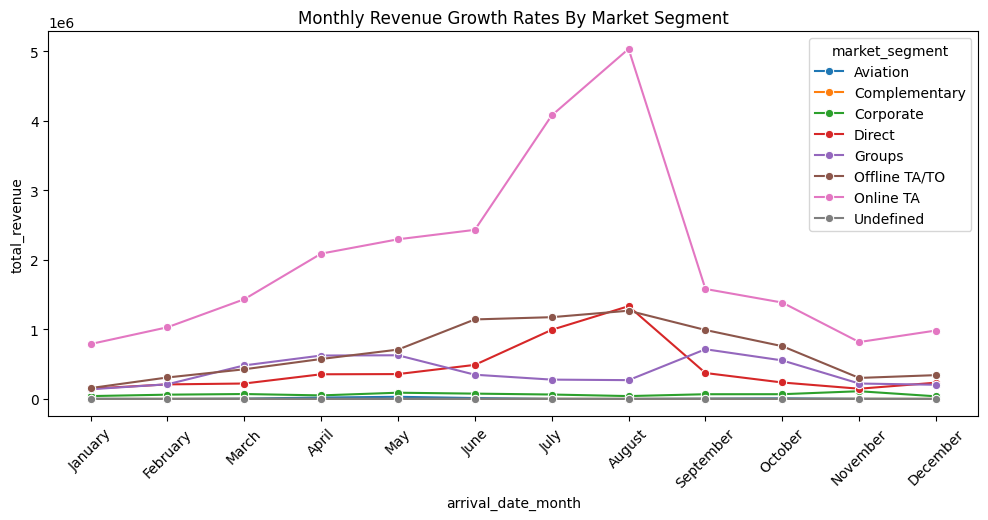

In [ ]:
monthly_segment_revenue = df.groupby(['arrival_date_month', 'market_segment'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='market_segment', data=monthly_segment_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Growth Rates By Market Segment")
plt.show()


<ipython-input-53-78880b1a9f95>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_hotel_revenue = df.groupby(['arrival_date_month', 'hotel'])['total_revenue'].sum().reset_index()


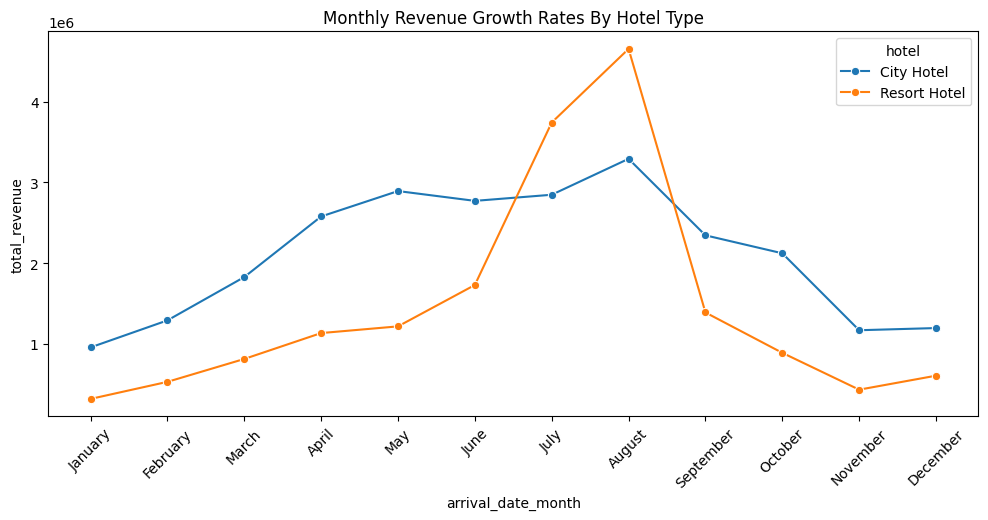

In [ ]:
monthly_hotel_revenue = df.groupby(['arrival_date_month', 'hotel'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='hotel', data=monthly_hotel_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Growth Rates By Hotel Type")
plt.show()


<ipython-input-55-600dd42db166>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df.groupby(['arrival_date_month'])['total_revenue'].sum().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


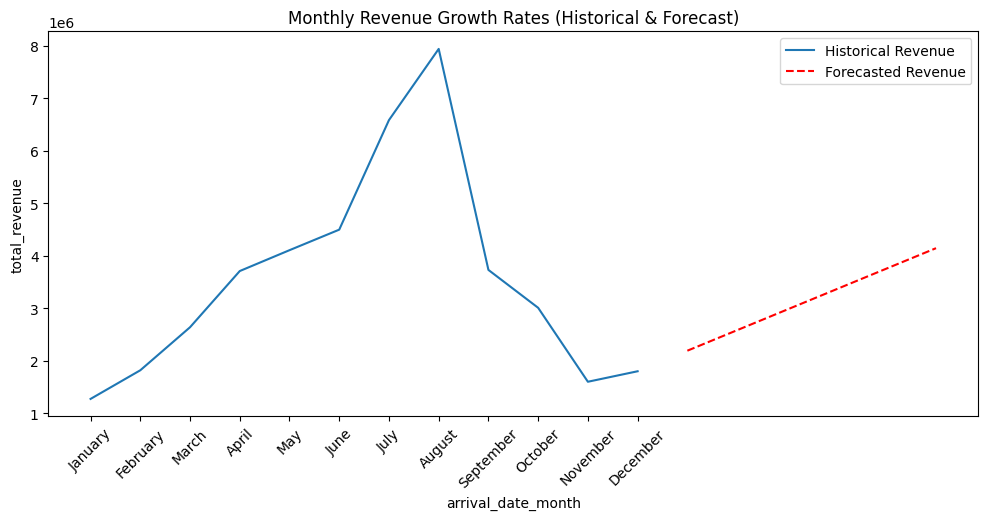

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ... (Your previous code for data loading, cleaning, and visualization) ...

# Forecasting Monthly Revenue (Corrected)
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
monthly_revenue = df.groupby(['arrival_date_month'])['total_revenue'].sum().reset_index()

# Train forecasting model without seasonality
model = ExponentialSmoothing(monthly_revenue['total_revenue'], trend="add")  # Removed seasonal="add" and seasonal_periods=12
fit = model.fit()
forecast = fit.forecast(6)  # Predict next 6 months

# Plot results
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_revenue['arrival_date_month'], y=monthly_revenue['total_revenue'], label="Historical Revenue")
plt.plot(range(len(monthly_revenue), len(monthly_revenue) + len(forecast)), forecast, label="Forecasted Revenue", linestyle="dashed", color="red")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Growth Rates (Historical & Forecast)")
plt.legend()
plt.show()


<ipython-input-58-2e205601085e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df.groupby('arrival_date_month')['total_revenue'].sum().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


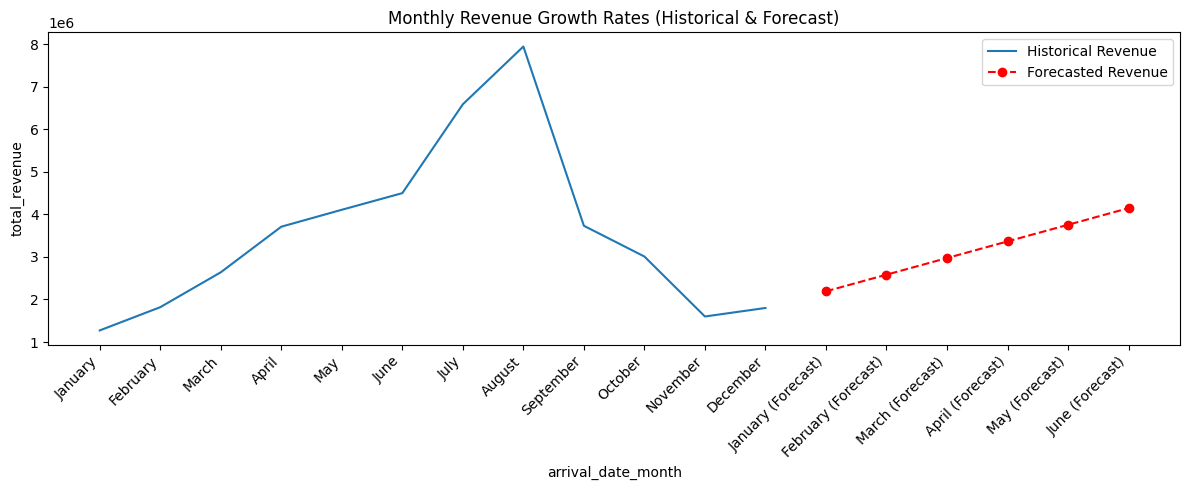

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ... (Your previous code for data loading, cleaning, and visualization) ...

# Forecasting Monthly Revenue (Corrected)
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
monthly_revenue = df.groupby('arrival_date_month')['total_revenue'].sum().reset_index()

# Ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['arrival_date_month'] = pd.Categorical(monthly_revenue['arrival_date_month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('arrival_date_month')

# Train forecasting model without seasonality
model = ExponentialSmoothing(monthly_revenue['total_revenue'], trend="add")  # Removed seasonal="add" and seasonal_periods=12
fit = model.fit()
forecast = fit.forecast(6)  # Predict next 6 months

# Extend month order for forecasted months
future_months = month_order + [f"{month} (Forecast)" for month in month_order[:6]]

# Plot results
plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', data=monthly_revenue, label="Historical Revenue")
plt.plot(future_months[12:18], forecast, label="Forecasted Revenue", linestyle="dashed", color="red", marker='o')  # Updated x-axis values
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.title("Monthly Revenue Growth Rates (Historical & Forecast)")
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

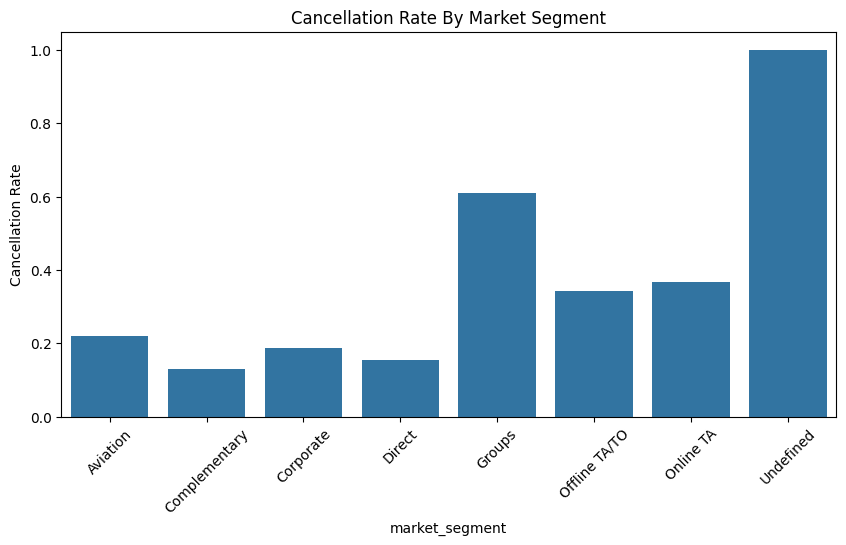

In [ ]:
cancel_rate_segment = df.groupby('market_segment')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='is_canceled', data=cancel_rate_segment)
plt.xticks(rotation=45)
plt.title("Cancellation Rate By Market Segment")
plt.ylabel("Cancellation Rate")
plt.show()


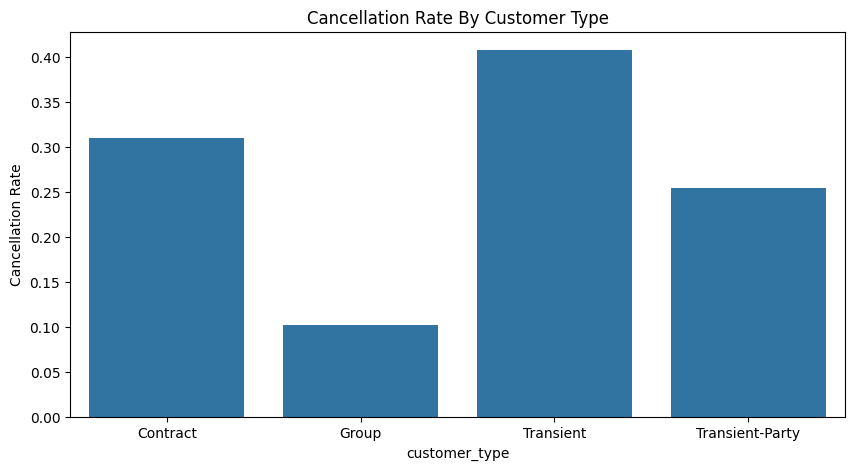

In [ ]:
cancel_rate_customer = df.groupby('customer_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='customer_type', y='is_canceled', data=cancel_rate_customer)
plt.title("Cancellation Rate By Customer Type")
plt.ylabel("Cancellation Rate")
plt.show()


<ipython-input-63-b59a00e34686>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()


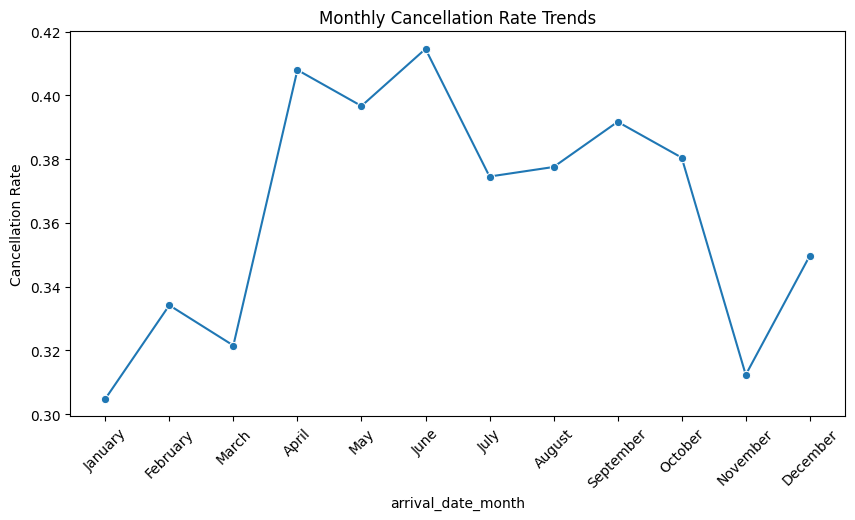

In [ ]:
monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='arrival_date_month', y='is_canceled', data=monthly_cancellations, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Cancellation Rate Trends")
plt.ylabel("Cancellation Rate")
plt.show()


<ipython-input-64-619f023feb5e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_hotel_revenue = df.groupby(['arrival_date_month', 'hotel'])['total_revenue'].sum().reset_index()


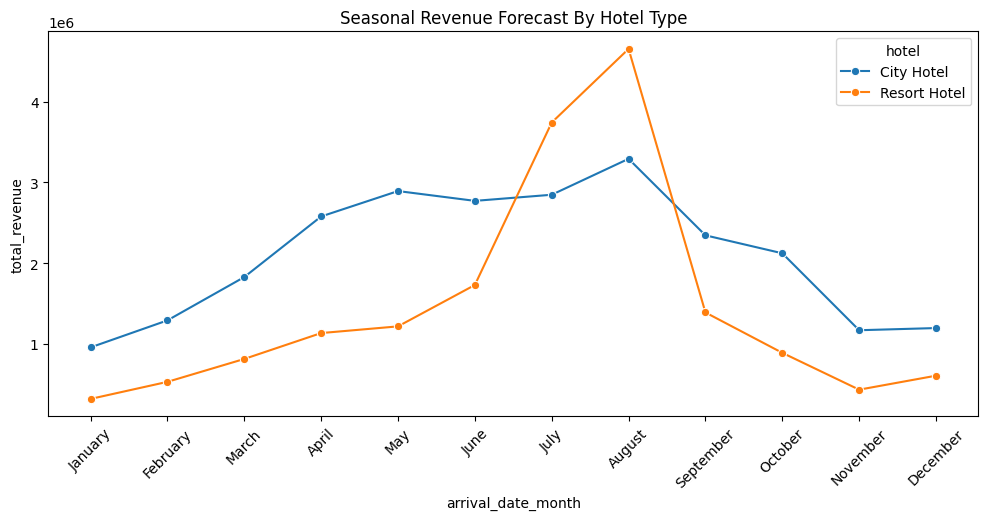

In [ ]:
seasonal_hotel_revenue = df.groupby(['arrival_date_month', 'hotel'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='hotel', data=seasonal_hotel_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Seasonal Revenue Forecast By Hotel Type")
plt.show()


<ipython-input-65-e4dca168882a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_adr = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()


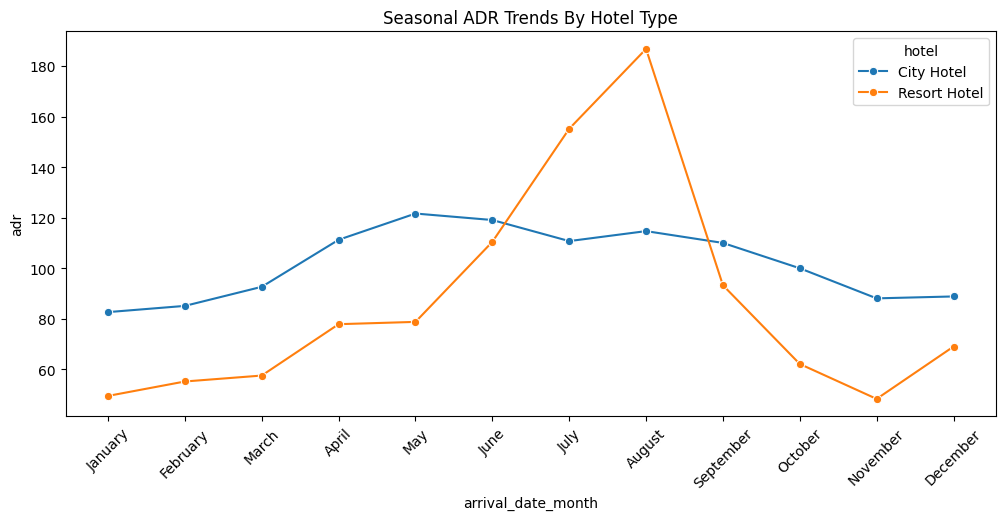

In [ ]:
seasonal_adr = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=seasonal_adr, marker='o')
plt.xticks(rotation=45)
plt.title("Seasonal ADR Trends By Hotel Type")
plt.show()


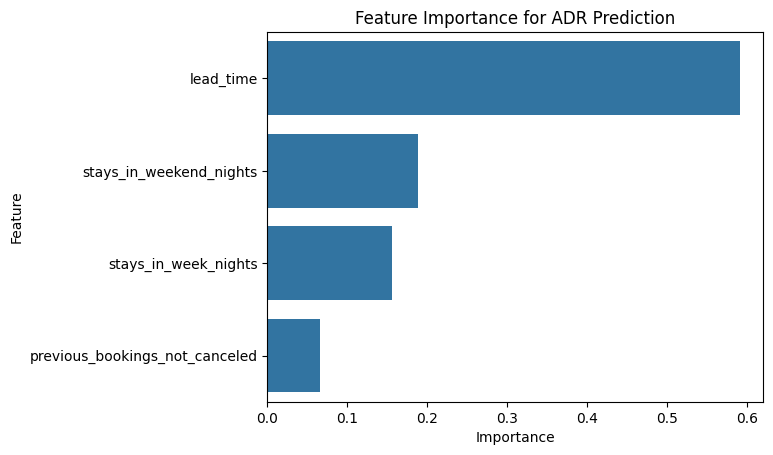

In [ ]:
from sklearn.ensemble import RandomForestRegressor

features = ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'previous_bookings_not_canceled']
X = df[features]
y = df['adr']

# Train model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance for ADR Prediction")
plt.show()


<ipython-input-67-fbf4e55cc4b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Training MSE: 2017.03, RMSE: 44.91
Testing MSE: 2007.30, RMSE: 44.80


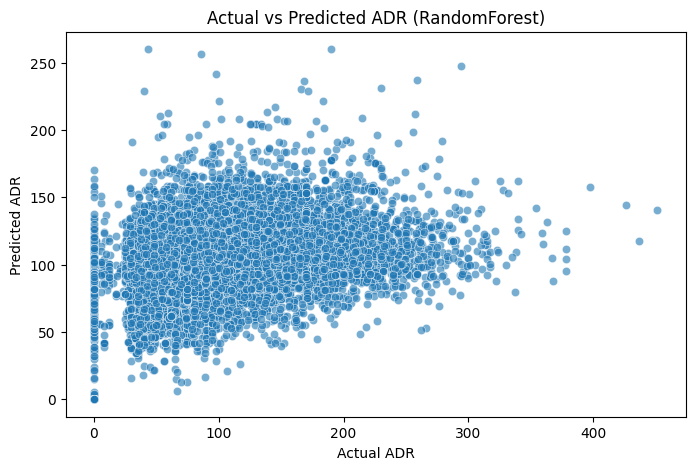

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant features for ADR prediction
features = ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'previous_bookings_not_canceled']
X = df[features]
y = df['adr']  # Target variable

# Handle missing values
X.fillna(X.median(), inplace=True)

# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}")
print(f"Testing MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}")

# Plot predicted vs actual values for test set
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual ADR")
plt.ylabel("Predicted ADR")
plt.title("Actual vs Predicted ADR (RandomForest)")
plt.show()


<ipython-input-68-b9e4ead8b25c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='adr', data=revenue_hotel, palette='viridis')


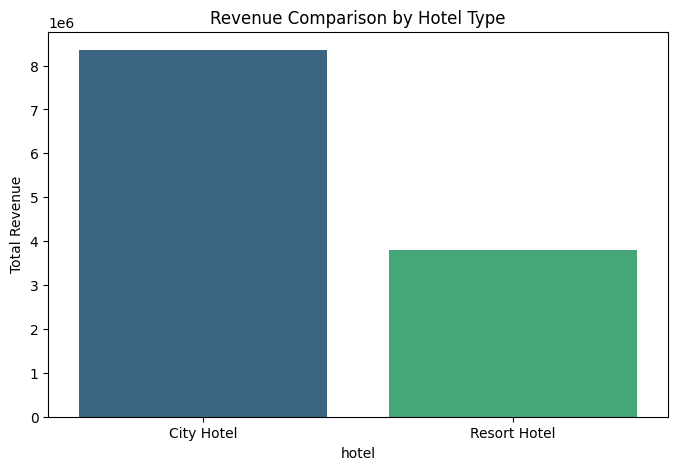

In [ ]:
revenue_hotel = df.groupby('hotel')['adr'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='adr', data=revenue_hotel, palette='viridis')
plt.title("Revenue Comparison by Hotel Type")
plt.ylabel("Total Revenue")
plt.show()


<ipython-input-70-e23b8c2f8c4a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deposit_type', y='is_canceled', data=cancel_rate_deposit, palette="coolwarm")


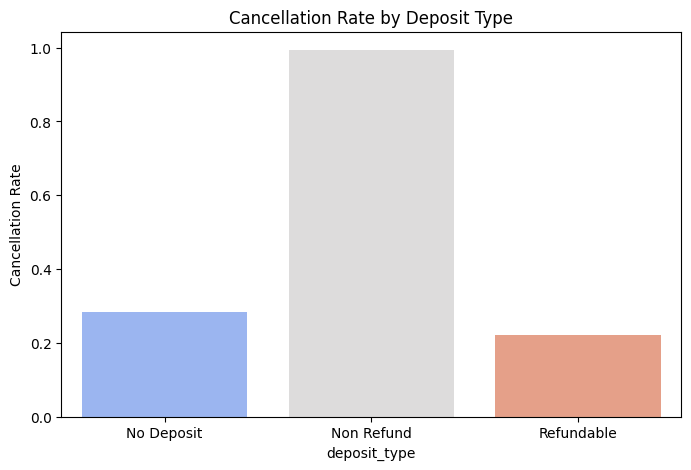

In [ ]:
cancel_rate_deposit = df.groupby('deposit_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='deposit_type', y='is_canceled', data=cancel_rate_deposit, palette="coolwarm")
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate")
plt.show()


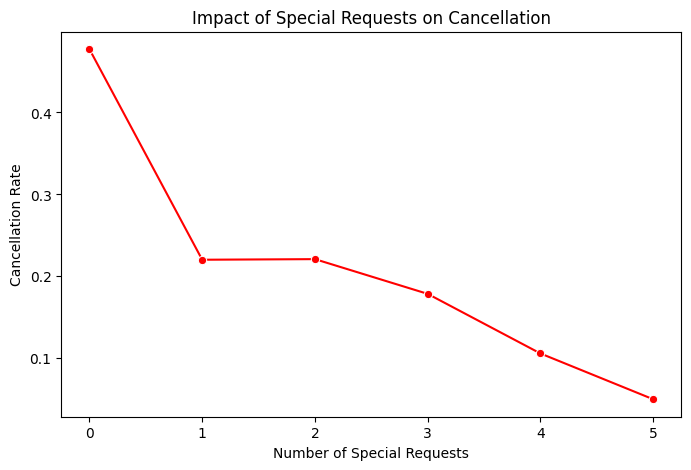

In [ ]:
requests_cancel = df.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='total_of_special_requests', y='is_canceled', data=requests_cancel, marker="o", color="red")
plt.title("Impact of Special Requests on Cancellation")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate")
plt.show()


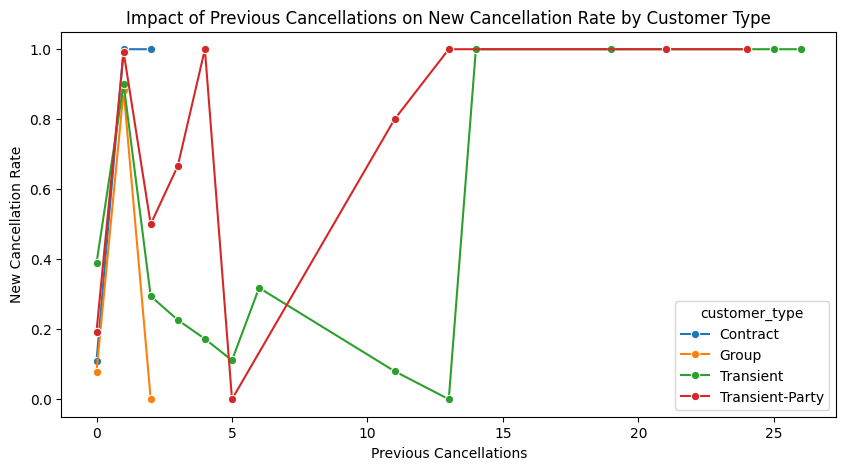

In [ ]:
previous_cancel_rate = df.groupby(['customer_type', 'previous_cancellations'])['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='previous_cancellations', y='is_canceled', hue='customer_type', data=previous_cancel_rate, marker="o")
plt.title("Impact of Previous Cancellations on New Cancellation Rate by Customer Type")
plt.xlabel("Previous Cancellations")
plt.ylabel("New Cancellation Rate")
plt.show()


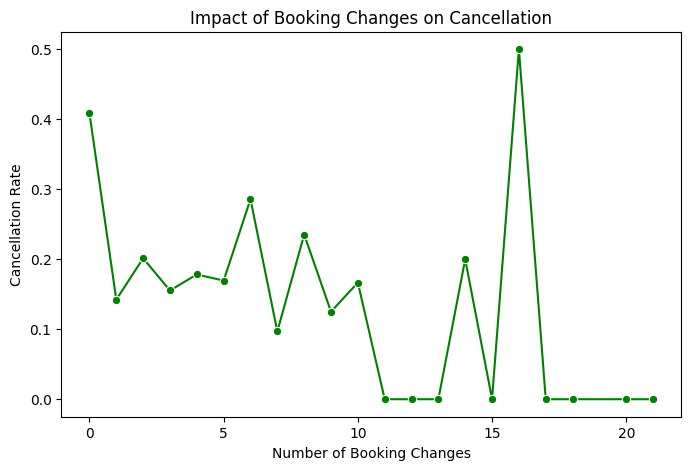

In [ ]:
booking_changes_cancel = df.groupby('booking_changes')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='booking_changes', y='is_canceled', data=booking_changes_cancel, marker="o", color="green")
plt.title("Impact of Booking Changes on Cancellation")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Cancellation Rate")
plt.show()


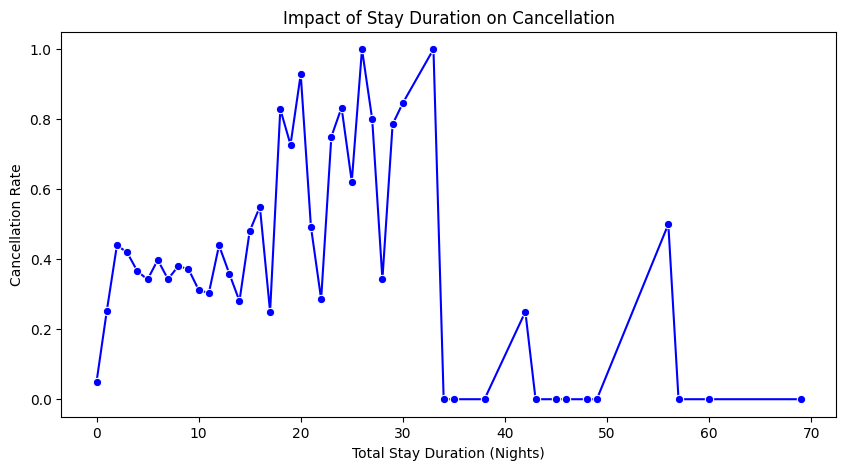

In [ ]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
stay_cancel_rate = df.groupby('total_stay')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='total_stay', y='is_canceled', data=stay_cancel_rate, marker="o", color="blue")
plt.title("Impact of Stay Duration on Cancellation")
plt.xlabel("Total Stay Duration (Nights)")
plt.ylabel("Cancellation Rate")
plt.show()


<ipython-input-75-ba9afa923bd9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='is_canceled', data=children_cancel_rate, palette="coolwarm")


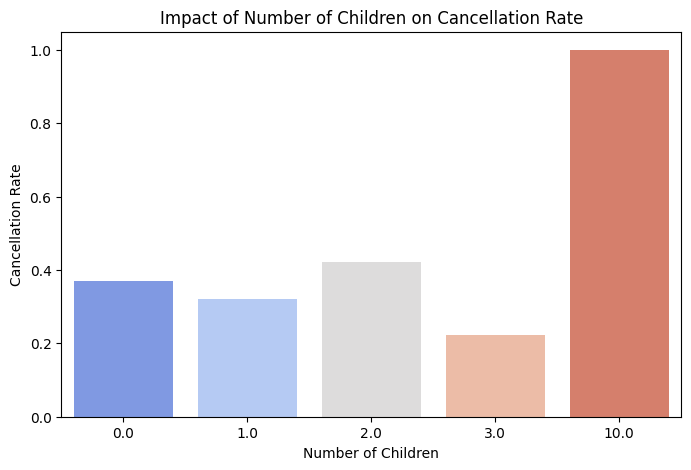

In [ ]:
children_cancel_rate = df.groupby('children')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='is_canceled', data=children_cancel_rate, palette="coolwarm")
plt.title("Impact of Number of Children on Cancellation Rate")
plt.xlabel("Number of Children")
plt.ylabel("Cancellation Rate")
plt.show()


<ipython-input-76-507a9cc3d561>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='adults', y='is_canceled', data=adults_cancel_rate, palette="coolwarm")


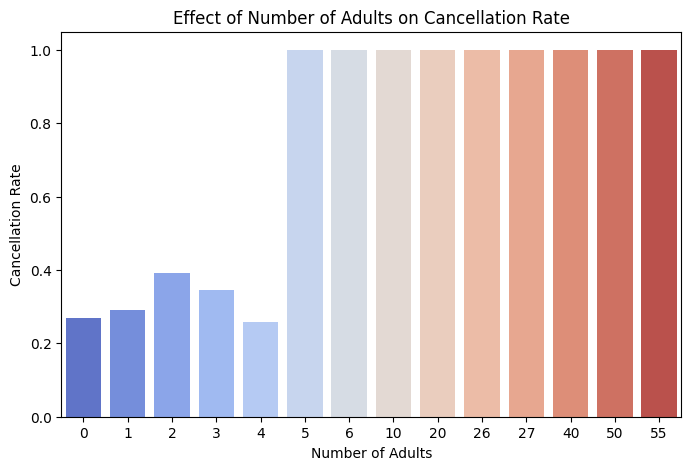

In [ ]:
adults_cancel_rate = df.groupby('adults')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='adults', y='is_canceled', data=adults_cancel_rate, palette="coolwarm")
plt.title("Effect of Number of Adults on Cancellation Rate")
plt.xlabel("Number of Adults")
plt.ylabel("Cancellation Rate")
plt.show()


<ipython-input-77-e5701e5a6d21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='is_canceled', data=cancel_day_rate, palette="coolwarm", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


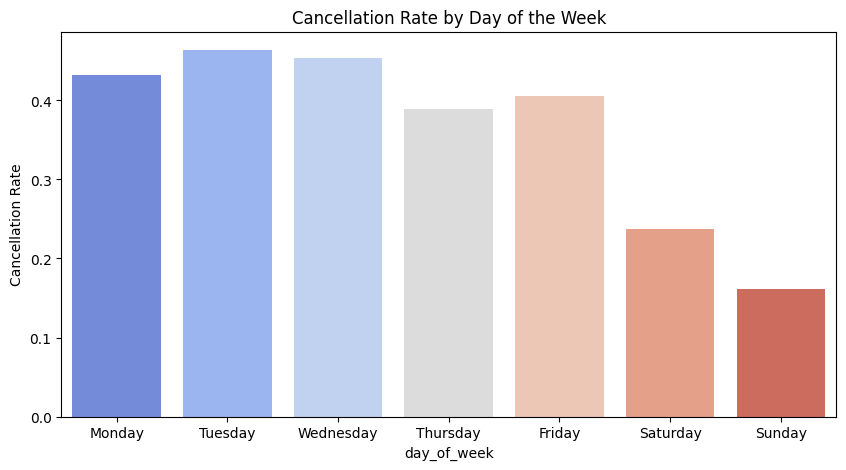

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['day_of_week'] = df['reservation_status_date'].dt.day_name()

cancel_day_rate = df.groupby('day_of_week')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='is_canceled', data=cancel_day_rate, palette="coolwarm", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Cancellation Rate by Day of the Week")
plt.ylabel("Cancellation Rate")
plt.show()


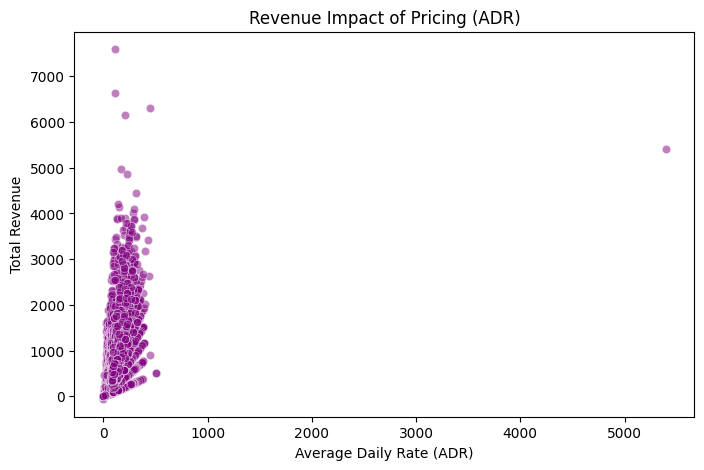

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='adr', y='total_revenue', data=df, alpha=0.5, color="purple")
plt.title("Revenue Impact of Pricing (ADR)")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Total Revenue")
plt.show()


<ipython-input-79-3d6b1c7853a1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_segment_revenue = df.groupby(['arrival_date_month', 'market_segment'])['total_revenue'].sum().reset_index()


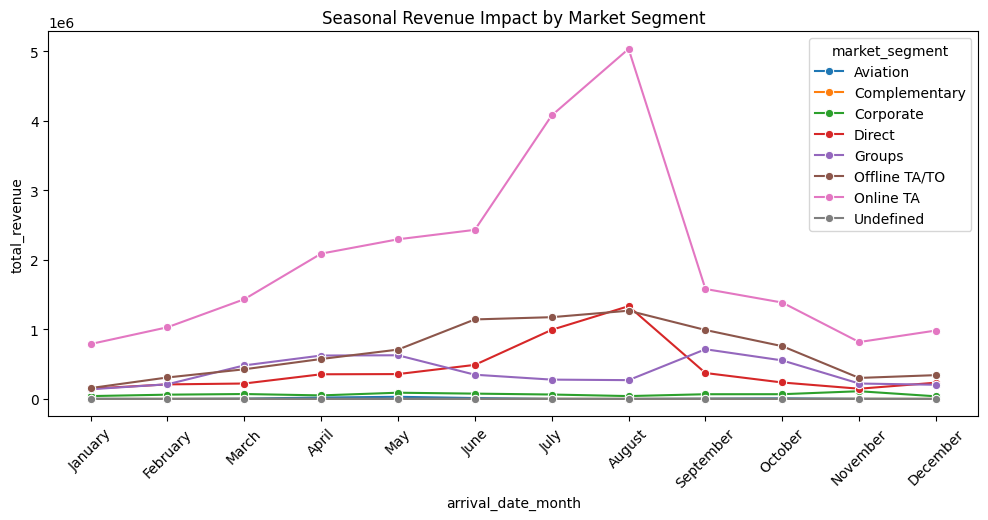

In [ ]:
seasonal_segment_revenue = df.groupby(['arrival_date_month', 'market_segment'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='market_segment', data=seasonal_segment_revenue, marker="o")
plt.xticks(rotation=45)
plt.title("Seasonal Revenue Impact by Market Segment")
plt.show()


<ipython-input-80-161728d9edae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_customer_revenue = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()


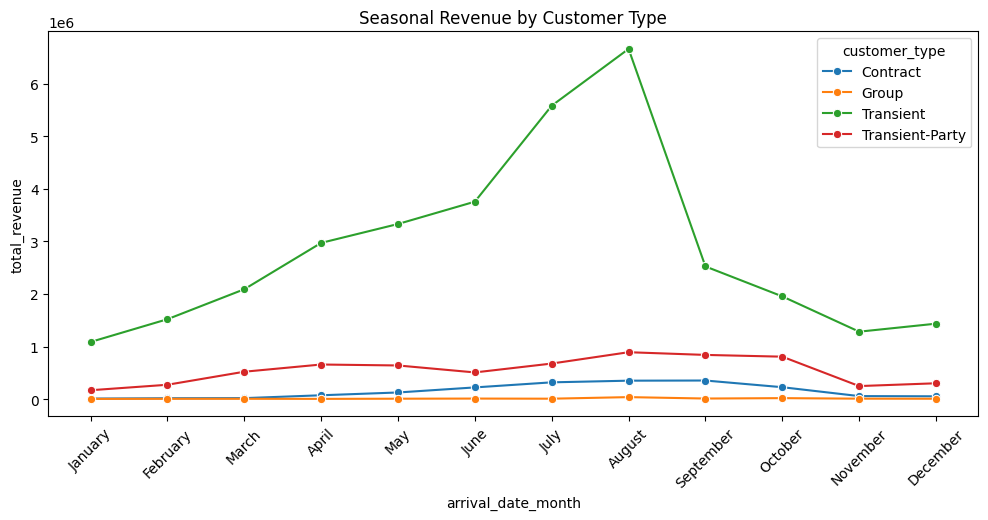

In [ ]:
seasonal_customer_revenue = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='customer_type', data=seasonal_customer_revenue, marker="o")
plt.xticks(rotation=45)
plt.title("Seasonal Revenue by Customer Type")
plt.show()


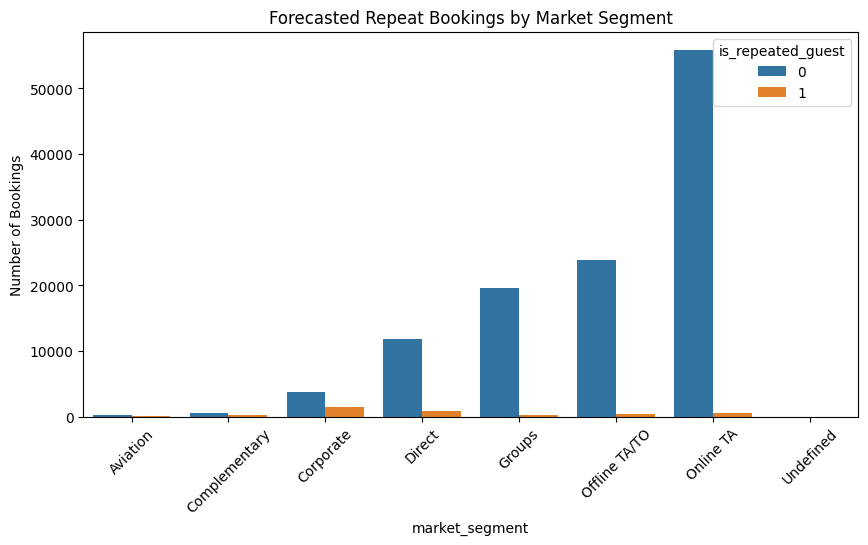

In [ ]:
repeat_bookings = df.groupby(['market_segment', 'is_repeated_guest']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='count', hue='is_repeated_guest', data=repeat_bookings)
plt.xticks(rotation=45)
plt.title("Forecasted Repeat Bookings by Market Segment")
plt.ylabel("Number of Bookings")
plt.show()


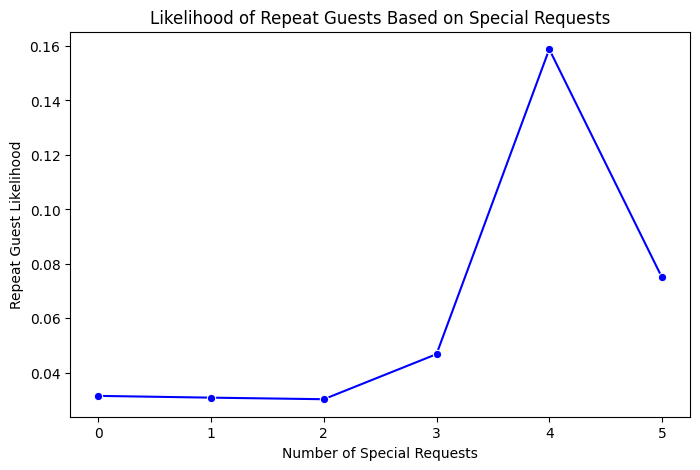

In [ ]:
repeat_special_requests = df.groupby('total_of_special_requests')['is_repeated_guest'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='total_of_special_requests', y='is_repeated_guest', data=repeat_special_requests, marker="o", color="blue")
plt.title("Likelihood of Repeat Guests Based on Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Repeat Guest Likelihood")
plt.show()


<ipython-input-83-1ec93a2fd9e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='is_repeated_guest', data=segment_repeat_rate, palette="coolwarm")


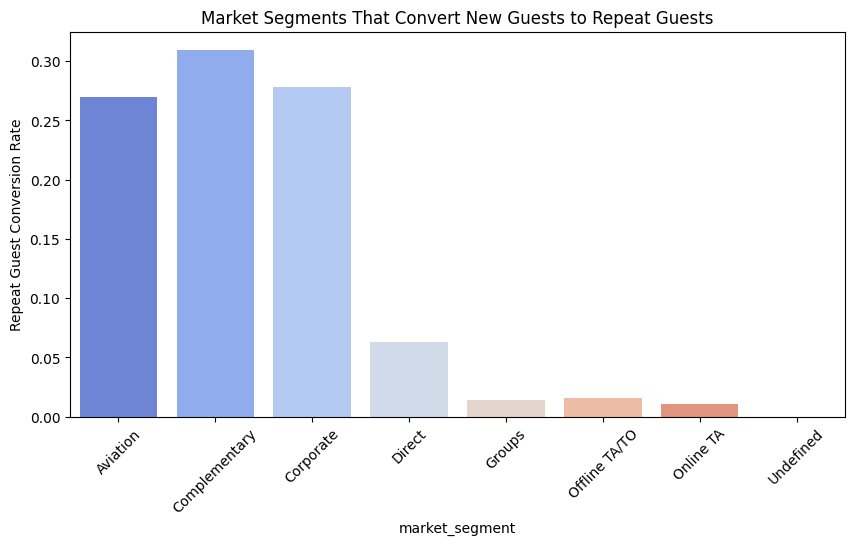

In [ ]:
segment_repeat_rate = df.groupby('market_segment')['is_repeated_guest'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='is_repeated_guest', data=segment_repeat_rate, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Market Segments That Convert New Guests to Repeat Guests")
plt.ylabel("Repeat Guest Conversion Rate")
plt.show()


<ipython-input-84-741eaa7a4cb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distribution_channel', y='is_repeated_guest', data=repeat_booking_channel, palette="viridis")


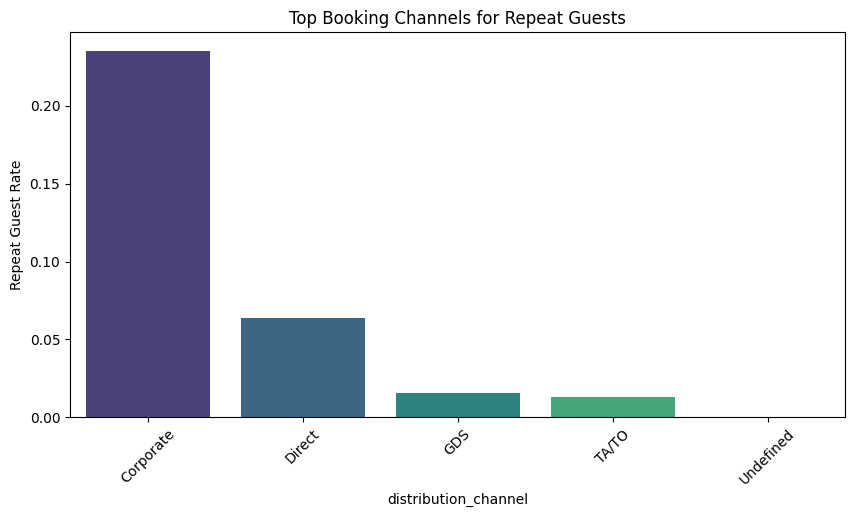

In [ ]:
repeat_booking_channel = df.groupby('distribution_channel')['is_repeated_guest'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='distribution_channel', y='is_repeated_guest', data=repeat_booking_channel, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top Booking Channels for Repeat Guests")
plt.ylabel("Repeat Guest Rate")
plt.show()


<ipython-input-85-49a33a80c8cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_repeated_guest', y='adr', data=df, palette="coolwarm")


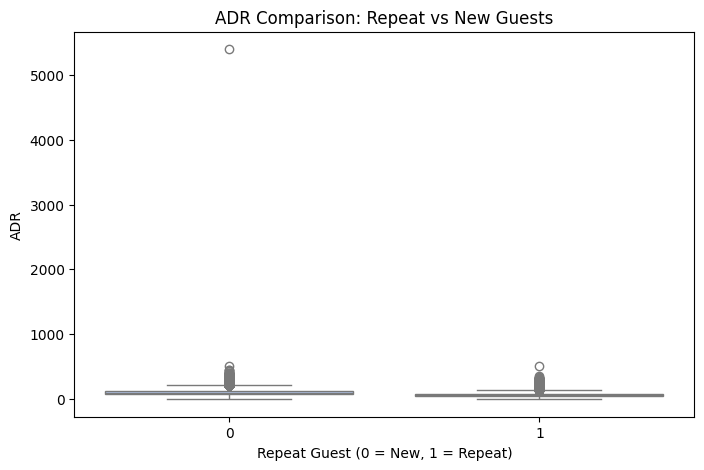

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_repeated_guest', y='adr', data=df, palette="coolwarm")
plt.title("ADR Comparison: Repeat vs New Guests")
plt.xlabel("Repeat Guest (0 = New, 1 = Repeat)")
plt.ylabel("ADR")
plt.show()


<ipython-input-86-75d0db677449>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_repeated_guest', y='is_canceled', data=cancel_rate_repeat, palette="coolwarm")


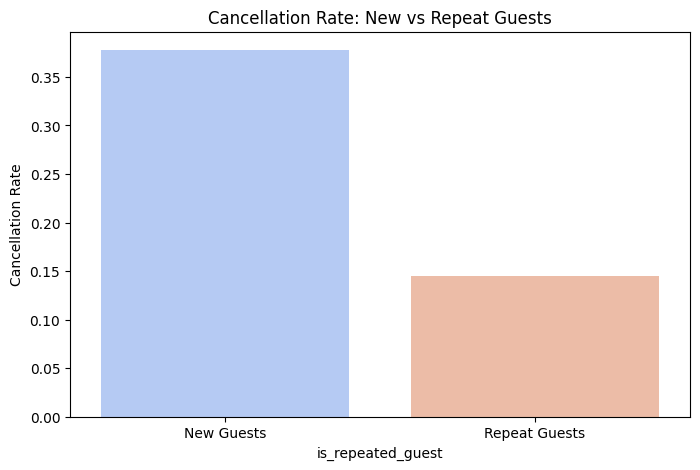

In [ ]:
cancel_rate_repeat = df.groupby('is_repeated_guest')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='is_repeated_guest', y='is_canceled', data=cancel_rate_repeat, palette="coolwarm")
plt.title("Cancellation Rate: New vs Repeat Guests")
plt.ylabel("Cancellation Rate")
plt.xticks(ticks=[0,1], labels=["New Guests", "Repeat Guests"])
plt.show()


<ipython-input-87-99847e251652>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='is_canceled', data=cancel_rate_source, palette="coolwarm")


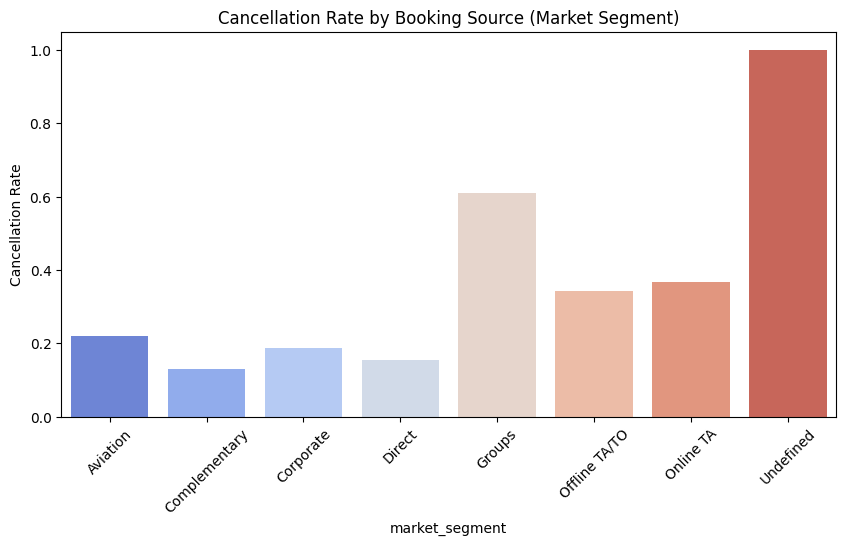

In [ ]:
cancel_rate_source = df.groupby('market_segment')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='is_canceled', data=cancel_rate_source, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Booking Source (Market Segment)")
plt.ylabel("Cancellation Rate")
plt.show()


<ipython-input-88-aab8894159de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='adr', data=adr_segment, palette="coolwarm")


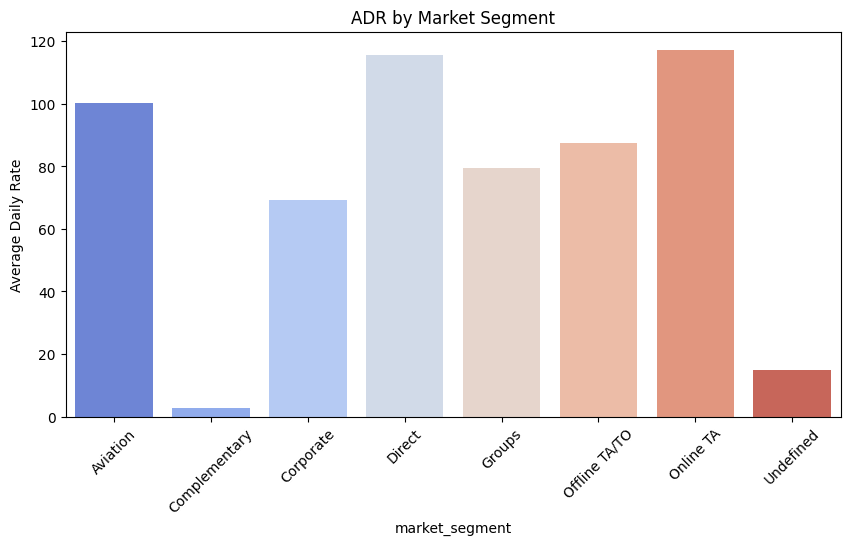

In [ ]:
adr_segment = df.groupby('market_segment')['adr'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='adr', data=adr_segment, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("ADR by Market Segment")
plt.ylabel("Average Daily Rate")
plt.show()


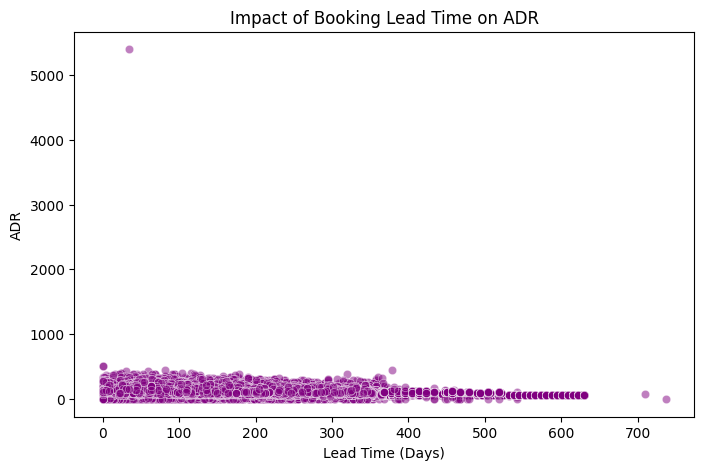

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.5, color="purple")
plt.title("Impact of Booking Lead Time on ADR")
plt.xlabel("Lead Time (Days)")
plt.ylabel("ADR")
plt.show()


<ipython-input-90-d3342782ca29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='adr', data=adr_guest_type, palette="coolwarm")


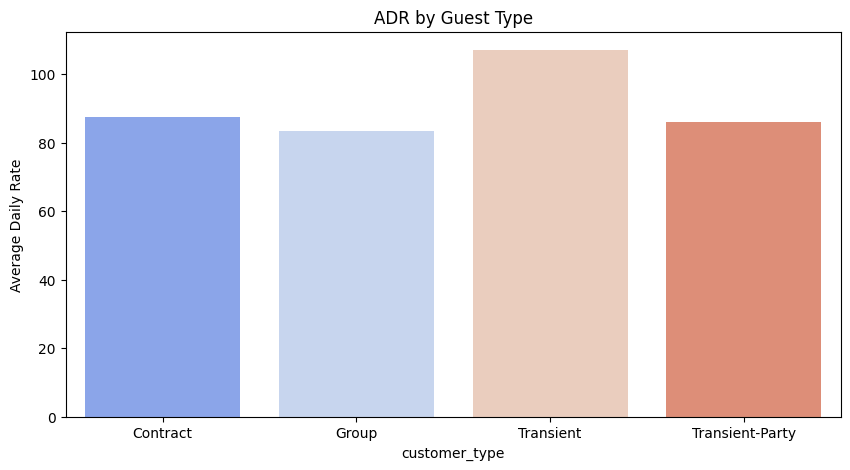

In [ ]:
adr_guest_type = df.groupby('customer_type')['adr'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='customer_type', y='adr', data=adr_guest_type, palette="coolwarm")
plt.title("ADR by Guest Type")
plt.ylabel("Average Daily Rate")
plt.show()


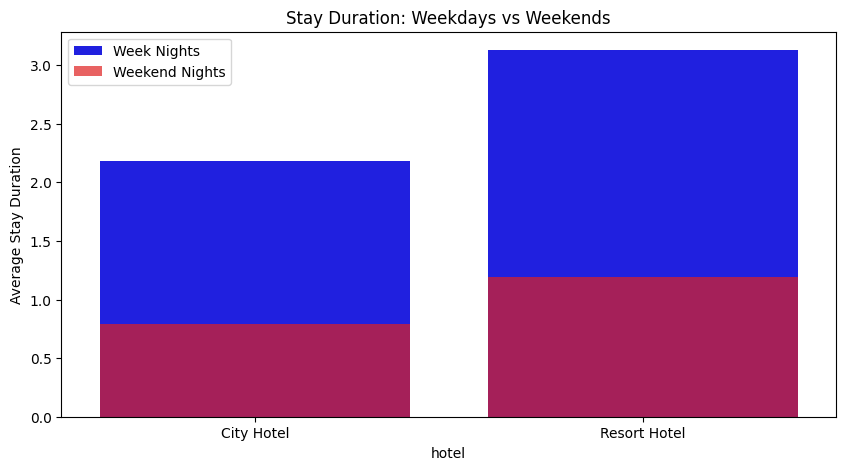

In [ ]:
stay_duration = df.groupby('hotel')[['stays_in_week_nights', 'stays_in_weekend_nights']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='hotel', y='stays_in_week_nights', data=stay_duration, color="blue", label="Week Nights")
sns.barplot(x='hotel', y='stays_in_weekend_nights', data=stay_duration, color="red", alpha=0.7, label="Weekend Nights")
plt.title("Stay Duration: Weekdays vs Weekends")
plt.ylabel("Average Stay Duration")
plt.legend()
plt.show()


<ipython-input-92-04406d0203df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='lead_time', data=lead_time_guest, palette="coolwarm")


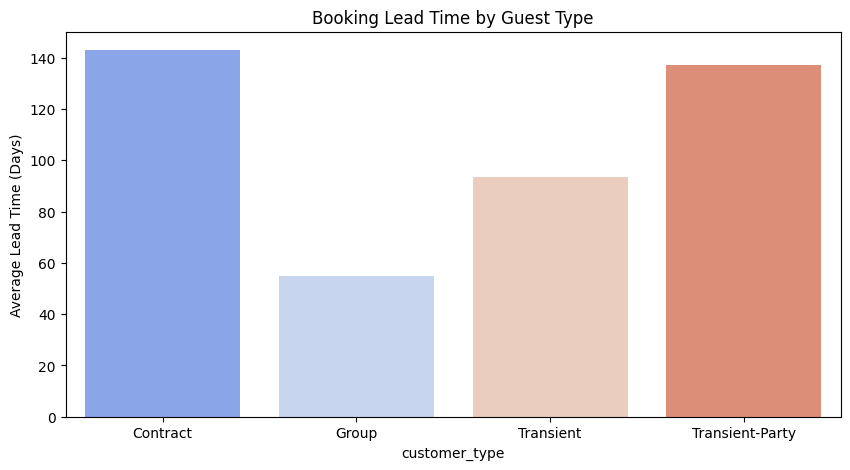

In [ ]:
lead_time_guest = df.groupby('customer_type')['lead_time'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='customer_type', y='lead_time', data=lead_time_guest, palette="coolwarm")
plt.title("Booking Lead Time by Guest Type")
plt.ylabel("Average Lead Time (Days)")
plt.show()


<ipython-input-93-37d1b16bca2a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue_guest = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()


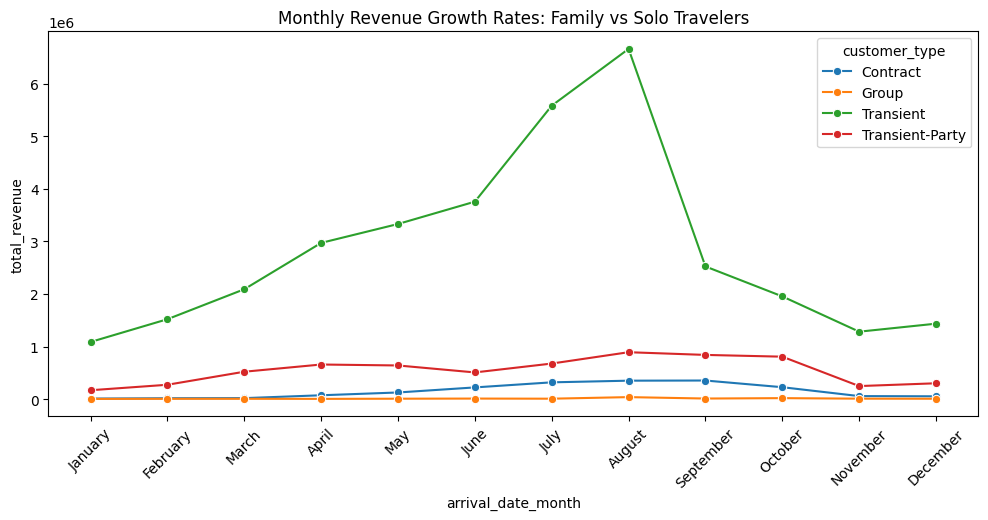

In [ ]:
monthly_revenue_guest = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='customer_type', data=monthly_revenue_guest, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Growth Rates: Family vs Solo Travelers")
plt.show()


<ipython-input-94-fa0d9dc72a18>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue_type = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()


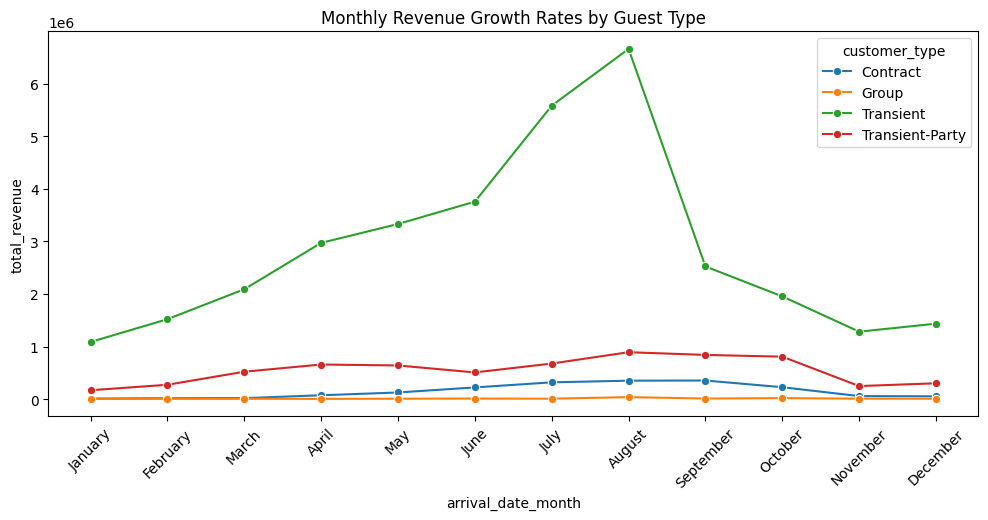

In [ ]:
monthly_revenue_type = df.groupby(['arrival_date_month', 'customer_type'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_month', y='total_revenue', hue='customer_type', data=monthly_revenue_type, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Growth Rates by Guest Type")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Select features and target variable
features = ['lead_time', 'market_segment', 'deposit_type', 'previous_cancellations']
X = df[features]
y = df['is_canceled']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for non-sparse output

# Fit and transform the categorical features
X_encoded = encoder.fit_transform(X[['market_segment', 'deposit_type']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['market_segment', 'deposit_type']))

# Concatenate the encoded features with the numerical features
X = pd.concat([X[['lead_time', 'previous_cancellations']], encoded_df], axis=1)

# Create new columns for encoded features in the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Rename encoded columns with prefixes 'marketsegment_encoded_' and 'deposittype_encoded_'
encoded_cols = [col for col in encoded_df.columns if 'market_segment' in col or 'deposit_type' in col]
rename_dict = {}
for col in encoded_cols:
    prefix = 'marketsegment_encoded_' if 'market_segment' in col else 'deposittype_encoded_'
    rename_dict[col] = f"{prefix}{col.split('_')[-1]}"

df = df.rename(columns=rename_dict)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Model Accuracy: 0.7752324315269286


Model Accuracy: 0.7752324315269286

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     14907
           1       0.86      0.48      0.62      8971

    accuracy                           0.78     23878
   macro avg       0.81      0.72      0.73     23878
weighted avg       0.79      0.78      0.76     23878


Confusion Matrix:
[[14206   701]
 [ 4666  4305]]


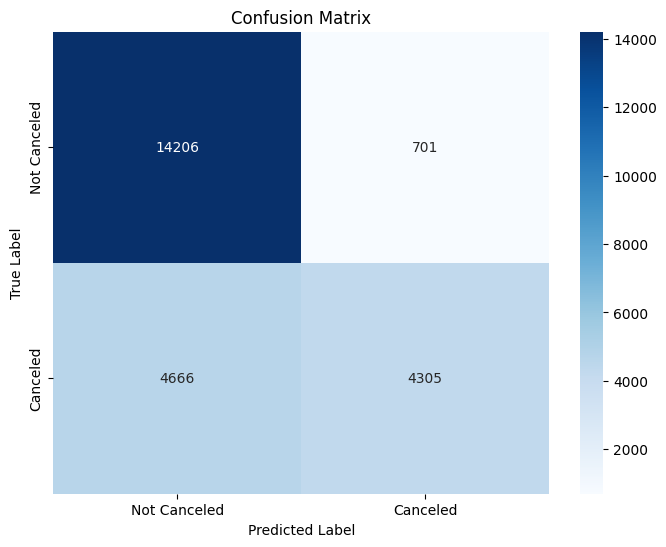

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your previous code for data loading, encoding, and model training) ...

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

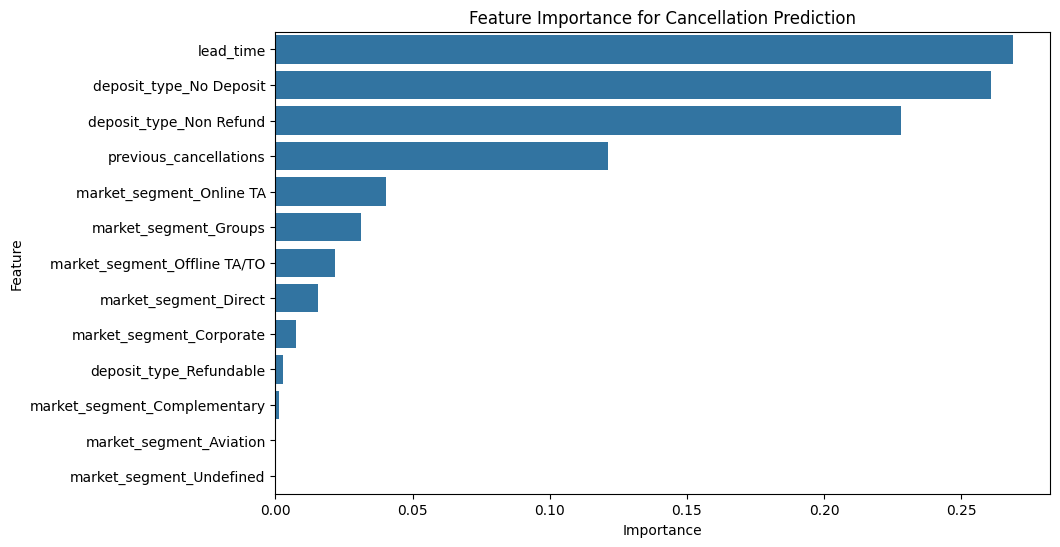

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance for Cancellation Prediction")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Select features for segmentation
features = ['lead_time', 'adr', 'total_of_special_requests', 'total_stay',
            'adults', 'children', 'babies', 'previous_cancellations',
            'required_car_parking_spaces']

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


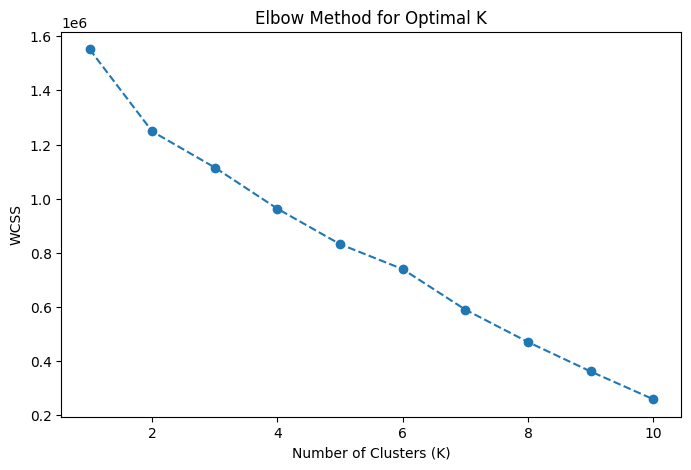

In [ ]:
# Find optimal K using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
# Train K-Means with Optimal Clusters (Assuming K=4)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['customer_segment'] = kmeans.fit_predict(X_scaled)

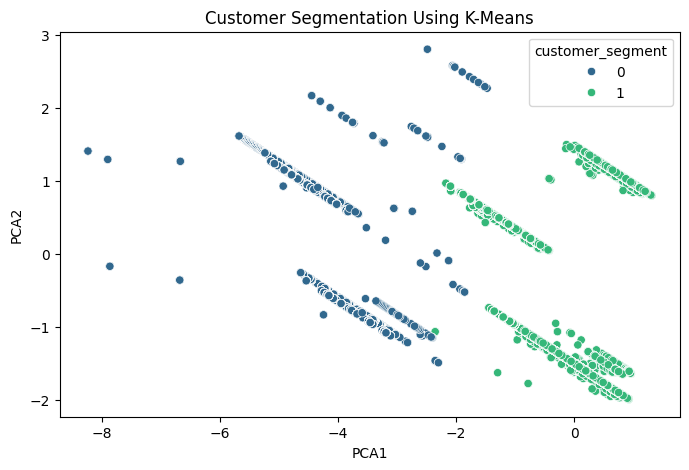

In [ ]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA Components and Cluster Labels
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['customer_segment'] = df['customer_segment']

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='customer_segment', palette="viridis", data=pca_df)
plt.title("Customer Segmentation Using K-Means")
plt.show()


In [ ]:
# Analyze Segment Characteristics
segment_analysis = df.groupby('customer_segment')[features].mean()

# Instead of using the unavailable ace_tools, display the DataFrame directly
print("Customer Segmentation Analysis:")
display(segment_analysis)

Customer Segmentation Analysis:


,lead_time,adr,total_of_special_requests,total_stay,adults,children,babies,previous_cancellations,required_car_parking_spaces
customer_segment,,,,,,,,,
0,212.273582,89.654331,0.003313,2.731219,1.812969,0.000947,0.000000,0.458314,0.001420
1,88.704783,103.552736,0.651676,3.526400,1.862544,0.118445,0.009073,0.034636,0.071156


<ipython-input-120-1365637e4d9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reserved_room_type', y='is_canceled', data=room_demand, palette="coolwarm")


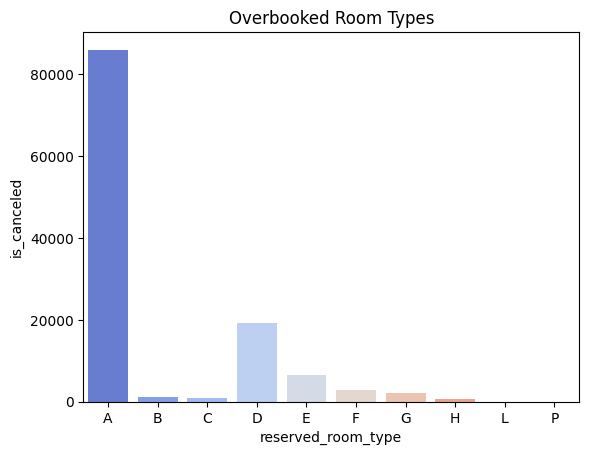

In [ ]:
room_demand = df.groupby('reserved_room_type')['is_canceled'].count().reset_index()
sns.barplot(x='reserved_room_type', y='is_canceled', data=room_demand, palette="coolwarm")
plt.title("Overbooked Room Types")
plt.show()


<ipython-input-121-95046e39eb30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='required_car_parking_spaces', y='adr', data=parking_demand, palette="coolwarm")


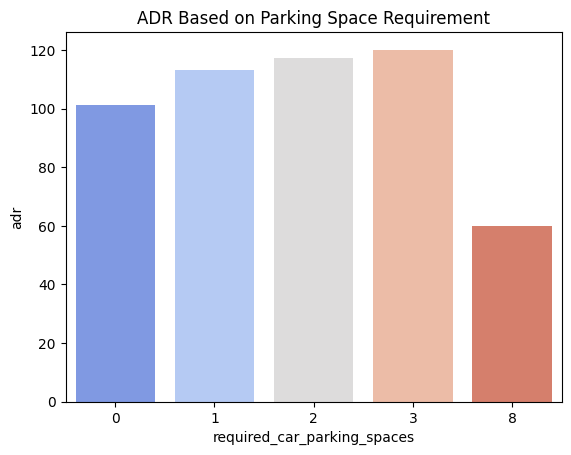

In [ ]:
parking_demand = df.groupby('required_car_parking_spaces')['adr'].mean().reset_index()
sns.barplot(x='required_car_parking_spaces', y='adr', data=parking_demand, palette="coolwarm")
plt.title("ADR Based on Parking Space Requirement")
plt.show()

<ipython-input-122-12214b56d18d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='is_canceled', data=segment_cancellation, palette="coolwarm")


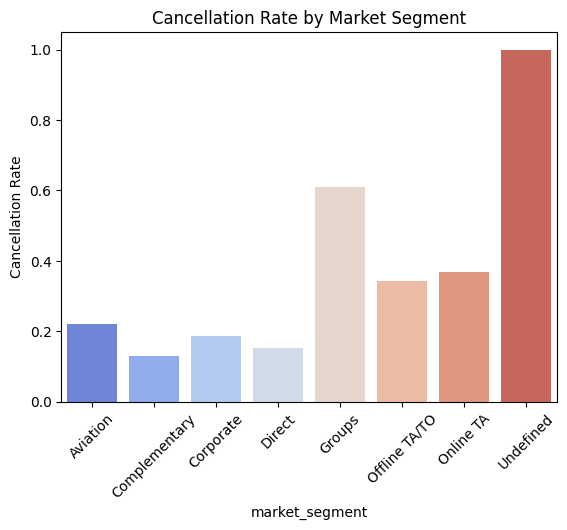

In [ ]:
segment_cancellation = df.groupby('market_segment')['is_canceled'].mean().reset_index()
sns.barplot(x='market_segment', y='is_canceled', data=segment_cancellation, palette="coolwarm")
plt.title("Cancellation Rate by Market Segment")
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate")
plt.show()


In [132]:
# Mean and Median Booking Lead Time
mean_lead_time = df['lead_time'].mean()
median_lead_time = df['lead_time'].median()

# ADR vs Cancellation Correlation
correlation_adr_cancellation = df[['adr', 'is_canceled']].corr().iloc[0, 1]


# Print results
print(f"Mean Booking Lead Time (Days): {mean_lead_time:.2f}")
print(f"Median Booking Lead Time (Days): {median_lead_time:.2f}")
print(f"ADR vs Cancellation Correlation: {correlation_adr_cancellation:.2f}")

Mean Booking Lead Time (Days): 104.01
Median Booking Lead Time (Days): 69.00
ADR vs Cancellation Correlation: 0.05


In [135]:
# Filter for bookings that were on the waiting list and canceled
canceled_waiting_list_bookings = df[(df['days_in_waiting_list'] > 0) & (df['is_canceled'] == 1)]

# Get the number of such bookings
num_canceled_waiting_list_bookings = len(canceled_waiting_list_bookings)

In [136]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Create a binary column indicating if the booking was on the waiting list
df['waiting_list_booking'] = (df['days_in_waiting_list'] > 0).astype(int)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V
correlation = cramers_v(df['is_canceled'], df['waiting_list_booking'])

print(f"Cramer's V correlation between cancellation and waiting list booking: {correlation:.2f}")

Cramer's V correlation between cancellation and waiting list booking: 0.10


In [137]:
# Create waiting list booking indicator (if not already created)
df['waiting_list_booking'] = (df['days_in_waiting_list'] > 0).astype(int)

# Calculate correlation
correlation = df['is_canceled'].corr(df['waiting_list_booking'])

# Print result
print(f"Correlation between cancellation and waiting list booking: {correlation:.2f}")

Correlation between cancellation and waiting list booking: 0.10
